In [12]:
import implementation

In [112]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

In [341]:
def lin_sep_data(n=100, mA=np.array([0.8,0.8]), mB=np.array([-0.8,-0.8]), sigmaA=0.5, sigmaB=0.5):
    """
    Creates 2 class lin sep dataset.
    
    Inputs:
    n = samples (must be even number)
    mA = mean of distrbution A
    mB = ___________________ B
    sigmaA = std. dev of A
    sigmaB = ___________ B
    
    Outputs:
    data = linearly separable dataset, where last column is targets (class), rest is patterns(features)
    """
    
    #keep making datasets until lin sep dataset is made ; will enter infinite loop if you choose shitty mean and sigmas
    separable = False
    while not separable:
        
        #create data
        A = np.array([np.random.normal(mA[0],sigmaA,(n//2,1)), np.random.normal(mA[1],sigmaA,(n//2,1))]).reshape(n//2,2)
        A = np.append(A,np.ones((n//2,1)),axis=1) # add targets
        B = np.array([np.random.normal(mB[0],sigmaB,(n//2,1)), np.random.normal(mB[1],sigmaB,(n//2,1))]).reshape(n//2,2)
        B = np.append(B,np.ones((n//2,1))*-1,axis=1) # add targets
        
        #print(A)
        #print(B)
        
        #only checks for vertical or horizontal separability
        separable = any([A[:, k].max() < B[:, k].min() or A[:, k].min() > B[:, k].max() for k in range(2)])
        
    #shuffle samples
    data = np.append(A,B,axis=0)
    np.random.shuffle(data)
    #print(data)
    
    #visualise
    plt.plot(A[:, 0], A[:, 1], 'r.',label='class A')
    plt.plot(B[:, 0], B[:, 1], 'b.',label='class B')
    plt.title('Linearly separable generated data 2D')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    plt.show()
    
    return data


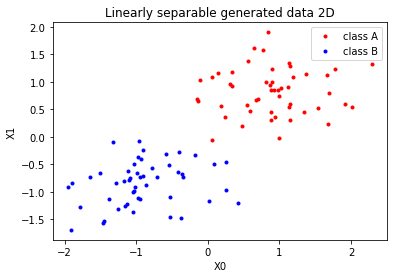

[[-1.3221118  -0.09004187 -1.        ]
 [ 1.68550478  0.80567556  1.        ]
 [-1.65010354 -0.73612164 -1.        ]
 [ 0.88619609  0.445102    1.        ]
 [ 1.18678383  1.08539463  1.        ]
 [-1.11645185 -0.61473064 -1.        ]
 [ 0.89394049  0.99716499  1.        ]
 [ 1.01522621  0.88250033  1.        ]
 [-0.96468423 -0.07788891 -1.        ]
 [ 0.34074028  1.17333949  1.        ]
 [ 0.18632829  0.56916434  1.        ]
 [-0.98431147 -0.66162594 -1.        ]
 [-0.86064402 -0.88242598 -1.        ]
 [ 0.70551403  0.69208165  1.        ]
 [-0.52901339 -1.0840382  -1.        ]
 [-0.42109738 -0.63223816 -1.        ]
 [-0.110013    1.03898     1.        ]
 [ 1.13126699  0.5397277   1.        ]
 [-0.52324923 -1.44691094 -1.        ]
 [-0.78233753 -0.55826848 -1.        ]
 [ 0.01296104 -1.16583405 -1.        ]
 [-1.03389939 -0.97742967 -1.        ]
 [-1.78983869 -1.2820846  -1.        ]
 [-1.05130541 -1.36345661 -1.        ]
 [ 1.37585022  1.13754577  1.        ]
 [-1.08797227 -0.75398764

In [406]:
data = lin_sep_data()
print(data)

In [646]:
class single_layered_perceptron():
    """
    Creates a single layer perceptron with 2 inputs and 2 outputs. 
    Change layers and weight&bias initialisation shapes for other input/output dimensions.
    
    Inputs:
    layers = [input,output] ie dxo
    update = 'batch' or 'sequential' learning
    learning = 'delta' rule or 'perceptron' rule
    lr = learning rate
    weights = init by randomly sampled around 0 with std dev 1
    bias = init as 0s
    """
    
    # nxo = (nx(d+1)) x ((d+1)xo)
    # Y = X x W
    
    def __init__(self, layers=[2,1], lr=.005, update='batch', rule='perceptron'):
        
        self.layers=layers
        self.lr=lr
        self.learning_rule=rule
        self.update = update
        # dxo
        weights=np.random.normal(0,1,(layers[0],layers[1]))
        # 1xo
        bias=np.zeros((1,layers[1]))
        # (d+1)xo
        self.weights = np.append(weights, bias, axis=0) # add weights of bias
        
    def rule(self,y_hat,targets):
        
        if (self.learning_rule=='perceptron'):
            
            #make prediction using step function
            pred = (y_hat>=0)*1 # 0/1 predictions
            pred = np.where(pred==0, -1, pred) #-1/1 predictions
            # different error calculation because single (1x1) target value creates some bugs
            if type(targets) is np.float64:
                error = targets-pred
            else:
                error = np.subtract(targets.reshape(targets.shape[0],self.layers[1]), pred)
            misclassifications = np.count_nonzero(error)
            
            return error, misclassifications
            
        
        if (self.learning_rule=='delta'):
            
            
            #count misclassifications for comparison - same as preceptron learning 
            pred = (y_hat>=0)*1 # 0/1 predictions
            pred = np.where(pred==0, -1, pred) #-1/1 predictions

            if type(targets) is np.float64:
                misclass = targets-pred
            else:
                misclass = np.subtract(targets.reshape(targets.shape[0],self.layers[1]), pred)
            misclassifications = np.count_nonzero(misclass)
            
            
            #error calculation for delta
            # different error calculation because single (1x1) target value creates some bugs
            if type(targets) is np.float64:
                error = targets-y_hat
                #print(error)
            else:
                error = np.subtract(targets.reshape(targets.shape[0],self.layers[1]), y_hat)
                #print(error.shape)
                #print(error)
                #print('error shape\n',error.shape)
            #calc mean squared error
            mse = (np.mean(error,axis=0))**2
            
            return error, misclassifications
            
        else: #change to raise ValError
            raise ValueError("Error - please use 'perceptron' or 'delta' as learning rule parameter.")
        
    def fit(self,patterns,targets,epochs):
        """
        patterns is X data (nxd)
        targets is Y labels (nx1)
        epochs is number of training iterations (int)
        """
        #n x (d+1)
        self.patterns = np.append(patterns, np.ones((patterns.shape[0],1)),axis=1)
        self.targets = targets
        
        if self.update=='batch':
            #for each bach
            performance = {'Epoch':[], 'Error Metric - Misclassifications':[] }
            for i in range(epochs):
                #predict
                y_hat = np.dot(self.patterns,self.weights)
                
                # calc error: either delta or perceptron rule
                error, error_metric = self.rule(y_hat,self.targets)
                
                #store results
                performance['Epoch'].append(i+1)
                performance['Error Metric - Misclassifications'].append(error_metric)
                
                # update weights
                # (d+1)xo = (d+1)xo + lr*((oxn)*nx(d+1)).T
                # print('error.T\n',error.T.shape)
                # print('patterns\n',self.patterns)
                self.weights = self.weights + self.lr * (np.dot(error.T, self.patterns)).T
                # print('WEIGHTS\n',self.weights)
                
            return performance,self.weights
                
            
            
        if self.update=='sequential':
            
            performance = {'Epoch':[], 'Error Metric - Misclassifications':[] }
            for i in range(epochs):
                #for each sample
                errormetric_per_epoch = []
                for j,sample in enumerate(self.patterns):
                    #predict
                    y_hat = np.dot(sample,self.weights)
                    
                    # calc error: either delta or perceptron rule
                    error, error_metric= self.rule(y_hat,self.targets[j])
                    #print(error.shape)
                    errormetric_per_epoch.append(error_metric)
        
                    #update weights
                    self.weights = self.weights + self.lr * (np.dot(error.reshape(error.shape[0],self.layers[1]).T, sample.reshape(1,self.patterns.shape[1]))).T
                    
                
                # convert to sample errors to error metric depending on rule
                if self.learning_rule=='delta':
                    #errormetric_per_epoch = np.mean(errormetric_per_epoch)
                    errormetric_per_epoch = np.count_nonzero(errormetric_per_epoch)
                if self.learning_rule=='perceptron':
                    errormetric_per_epoch = np.count_nonzero(errormetric_per_epoch)
                
                #store results
                performance['Error Metric - Misclassifications'].append(errormetric_per_epoch)
                performance['Epoch'].append(i+1)
        
            return performance,self.weights
            
        else:
            raise ValueError("Error - please use 'perceptron' or 'delta' as learning rule parameter.")
            

        
        
    

In [195]:
def nonlin_sep_data(n=100, mA=np.array([0.6,0.6]), mB=np.array([-0.6,-0.6]), sigmaA=0.5, sigmaB=0.5):
    """
    Creates 2 class nonlin sep dataset. Check via plot to confirm nonlinear separability, it only checks vertically and horizontally!
    
    Inputs:
    n = samples (must be even number)
    mA = mean of distrbution A
    mB = ___________________ B
    sigmaA = std. dev of A
    sigmaB = ___________ B
    
    Outputs:
    data =  vertically&horizontally nonlinear separable dataset, where last column is targets (class), rest is patterns(features)
    """
    
    #keep making datasets until nonlin sep dataset is made ; will enter infinite loop if you choose shitty mean and sigmas
    separable = True
    while separable:
        
        #create data
        A = np.array([np.random.normal(mA[0],sigmaA,(n//2,1)), np.random.normal(mA[1],sigmaA,(n//2,1))]).reshape(n//2,2)
        A = np.append(A,np.ones((n//2,1)),axis=1) # add targets
        B = np.array([np.random.normal(mB[0],sigmaB,(n//2,1)), np.random.normal(mB[1],sigmaB,(n//2,1))]).reshape(n//2,2)
        B = np.append(B,np.ones((n//2,1))*-1,axis=1) # add targets
        
        #print(A)
        #print(B)
        
        #only checks for vertical or horizontal separability - so it could still be diagonally separable
        separable = any([A[:, k].max() < B[:, k].min() or A[:, k].min() > B[:, k].max() for k in range(2)])
        
    #shuffle samples
    data = np.append(A,B,axis=0)
    np.random.shuffle(data)
    #print(data)
    
    #visualise
    plt.plot(A[:, 0], A[:, 1], 'r.',label='class A')
    plt.plot(B[:, 0], B[:, 1], 'b.',label='class B')
    plt.title('Not linearly separable generated data 2D')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    plt.show()
    
    return data


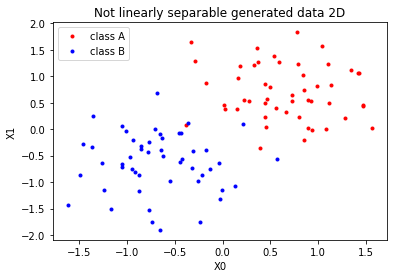

In [196]:
nonsep_data = nonlin_sep_data()

In [582]:
def nonlin_sep_data_part2(n=100, mA=np.array([1,0.3]), mB=np.array([0,-0.1]), sigmaA=0.2, sigmaB=0.3):
    """
    Creates 2 class nonlin sep dataset. Check via plot to confirm nonlinear separability, it only checks vertically and horizontally!
    
    Inputs:
    n = samples (must be even number)
    mA = mean of distrbution A
    mB = ___________________ B
    sigmaA = std. dev of A
    sigmaB = ___________ B
    
    Outputs:
    data =  vertically&horizontally nonlinear separable dataset, where last column is targets (class), rest is patterns(features)
    """
    

        
    #create data
    A1_col1= np.array([np.random.normal(-mA[0],sigmaA,(n//4,1))]).reshape(n//4,1)#, np.random.normal(mA[1],sigmaA,(n//4,1))])#.reshape(n//4,2)
    A1_col2 = np.array([np.random.normal(mA[1],sigmaA,(n//4,1))]).reshape(n//4,1)
    print(A1_col1.shape)
    A1 = np.append(A1_col1,A1_col2,axis=1)
    print(A1.shape)

    A2_col1= np.array([np.random.normal(mA[0],sigmaA,(n//4,1))]).reshape(n//4,1)#, np.random.normal(mA[1],sigmaA,(n//4,1))])#.reshape(n//4,2)
    A2_col2 = np.array([np.random.normal(mA[1],sigmaA,(n//4,1))]).reshape(n//4,1)
    A2 = np.append(A2_col1,A2_col2,axis=1)
    #print(A1.shape)
    #A2 = np.array([np.random.normal(mA[0],sigmaA,(n//4,1)), np.random.normal(mA[1],sigmaA,(n//4,1))]).reshape(n//4,2)
    #print(A2)
    A = np.append(A1,A2,axis=0)
    #print(A.shape)
    A = np.append(A.reshape(n//2,2),np.ones((n//2,1)),axis=1) # add targets
    #print()
#     B = np.array([np.random.normal(mB[0],sigmaB,(n//2,1)), np.random.normal(mB[1],sigmaB,(n//2,1))]).reshape(n//2,2)
    
    
    B_col1 = np.array([np.random.normal(mB[0],sigmaB,(n//2,1))]).reshape(n//2,1)
    B_col2 = np.array([np.random.normal(mB[1],sigmaB,(n//2,1))]).reshape(n//2,1)
    B = np.append(B_col1,B_col2,axis=1)
    B = np.append(B,np.ones((n//2,1))*-1,axis=1) # add targets
    
    #shuffle samples
    data = np.append(A,B,axis=0)
    np.random.shuffle(data)
    #print(data)
    
    #visualise
    plt.plot(A[:, 0], A[:, 1], 'r.',label='class A')
    plt.plot(B[:, 0], B[:, 1], 'b.',label='class B')
    plt.title('Not linearly separable generated data 2D')
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    plt.show()
    
    return data


(25, 1)
(25, 2)


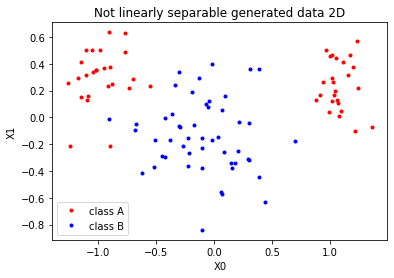

In [584]:
nonsep_data2 = nonlin_sep_data_part2()

In [ ]:
# plots a decision boundary based on the y = formula
def decision_boundary(patterns, targets, final_weights, bias, rule, update, learning_step):
    # visualise
    #     plt.plot(A[:, 0], A[:, 1], 'r.',label='class A')
    #     plt.plot(B[:, 0], B[:, 1], 'b.',label='class B')

    #     graph(lambda x: (final_weights.T*x)+bias, range(-2, 2))
    x = np.linspace(-1, 1, 30)
    print(patterns.shape)
    y = -(final_weights[0] * x + bias) / final_weights[1]
    print(y.shape)
    print(x.shape)
    plt.plot(x, y, label='Decision boundary')
    plt.xlim(left=-2, right=2)
    plt.ylim(bottom=-2, top=2)
    # graph(lambda x: (np.dot(final_weights.T,x))+bias)

    colormap = np.array(['r', 'b'])

    red = np.where(targets == -1)
    blue = np.where(targets == 1)
    # print(red)
    # print(patterns.shape)

    plt.scatter(patterns.T[0][red], patterns.T[1][red], c='r', label='class 1', s=8)
    plt.scatter(patterns.T[0][blue], patterns.T[1][blue], c='b', label='class 2', s=8)

    # plt.plot(patterns.)
    # plt.xlabel('potential [uV] in {} at {} ms'.format(chans[0], time_points[0]))
    plt.title('{} with {} update after 25 epochs with learning step of {}'.format(rule, update, learning_step))
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    plt.show()

In [644]:

#plots a decision boundary based on the y = formula
def decision_boundary(patterns,targets, final_weights1, bias1, rule1, update, learning_step, final_weights2, bias2, rule2):
    
        #visualise
#     plt.plot(A[:, 0], A[:, 1], 'r.',label='class A')
#     plt.plot(B[:, 0], B[:, 1], 'b.',label='class B')
    
#     graph(lambda x: (final_weights.T*x)+bias, range(-2, 2))
    x = np.linspace(-1,1,30)
    #print(patterns.shape)
    y1 = -(final_weights1[0]*x+bias1)/final_weights1[1]
    y2 = -(final_weights2[0]*x+bias2)/final_weights2[1]
    #print(y.shape)
    #print(x.shape)
    plt.plot(x, y1,label='{}'.format(rule1))
    plt.plot(x, y2,label='{}'.format(rule2))
    plt.xlim(left=-2,right=2)
    plt.ylim(bottom=-2,top=2)
    #graph(lambda x: (np.dot(final_weights.T,x))+bias)
    
    colormap = np.array(['r', 'b'])
    
    red = np.where(targets==-1)
    blue = np.where(targets==1)
    #print(red)
    #print(patterns.shape)
    
    plt.scatter(patterns.T[0][red],patterns.T[1][red],c='r',label='class 1',s=8)
    plt.scatter(patterns.T[0][blue],patterns.T[1][blue],c='b',label='class 2',s=8)
    
    #plt.plot(patterns.)
    #plt.xlabel('potential [uV] in {} at {} ms'.format(chans[0], time_points[0]))
    plt.title('Learning algorithm solution with {} update after 25 epochs with learning step of {}'.format(update,learning_step))
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    #plt.show()


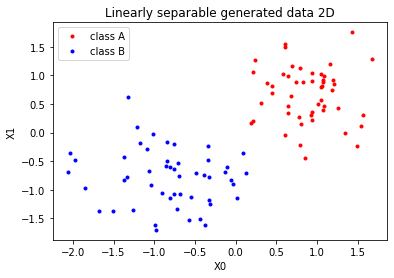

In [652]:
# 3.1.1 Linearly separable data

linsep_data = lin_sep_data()

In [689]:
learning_rates = [0.001,0.005,0.01,0.05]

batch = {'Means':[],'Std':[]}
sequential = {'Means':[],'Std':[]}

for rate in learning_rates:
    #perf1 = []
    #perf2 = []
    for i in range(10):
    #perceptron
        batch = single_layered_perceptron(lr=rate,update='batch',rule='delta')
        performance, weights = batch.fit(patterns = linsep_data[:,:2], targets = linsep_data[:,2], epochs = 25)
    #decision_boundary(patterns = linsep_data[:,:2], targets = linsep_data[:,2], final_weights = weights[:2], bias = weights[2], rule='Perceptron learning', update='batch',learning_step=rate)
        delta = single_layered_perceptron(lr=rate,update='sequential',rule='delta')
        performance2, weights2 = delta.fit(patterns = linsep_data[:,:2], targets = linsep_data[:,2], epochs = 25)
        #decision_boundary(patterns = linsep_data[:,:2], targets = linsep_data[:,2], final_weights1 = weights[:2], bias1 = weights[2], rule1='Perceptron learning',update='batch',learning_step=rate,final_weights2=weights2[:2],bias2=weights2[2],rule2='Delta rule')
        print('Learning rate =',rate)
        print(performance2['Error Metric - Misclassifications'])
        #print(np.where(performance['Error Metric - Misclassifications']==0))
        #perf1.append(np.where(performance['Error Metric - Misclassifications']==0)[0]+1)
        #perf2.append(np.where(performance2['Error Metric - Misclassifications']==0)[0]+1)
        
    #print(perf1)
        
    #batch['Means'].append(np.mean(perf1))
    #batch['Std'].append(np.std(perf1))
    #sequential['Means'].append(np.mean(perf2))
    #sequential['Std'].append(np.std(perf2))
    
    
#     plt.show()
    
#     plt.title('Delta rule for linearly separable data with different updates and a learning rate of {}'.format(rate))
#     plt.plot(performance1['Epoch'],performance1['Error Metric - Misclassifications'],label='batch')
#     plt.plot(performance2['Epoch'],performance2['Error Metric - Misclassifications'],label='sequential')
#     plt.ylim(bottom=0,top=100)
#     plt.ylabel('Misclassifications')
#     plt.xlabel('Epochs')
#     plt.legend()
#     plt.show()

Learning rate = 0.001
[100, 100, 100, 100, 100, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Learning rate = 0.001
[89, 86, 75, 56, 42, 29, 20, 15, 10, 8, 5, 5, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Learning rate = 0.001
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Learning rate = 0.001
[39, 31, 22, 18, 13, 12, 9, 6, 5, 5, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]
Learning rate = 0.001
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Learning rate = 0.001
[98, 96, 89, 63, 27, 7, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Learning rate = 0.001
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]
Learning rate = 0.001
[96, 91, 86, 76, 67, 52, 41, 30, 20, 17, 12, 7, 7, 5, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1]
Learning rate = 0.001
[98, 96, 89, 82, 59, 35, 22, 15, 8, 5, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0]
Learning rate = 0.001
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 

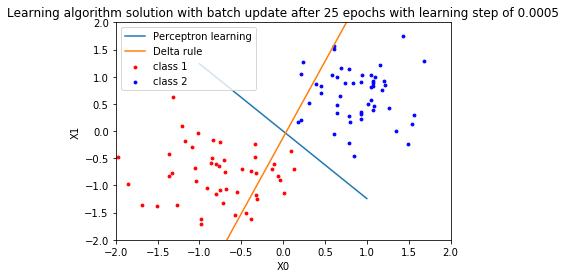

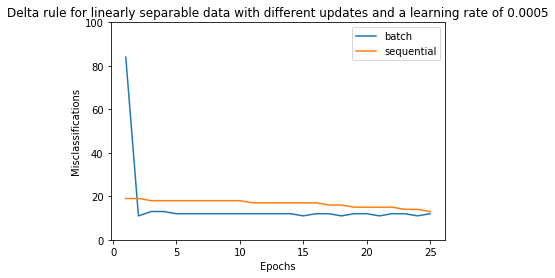

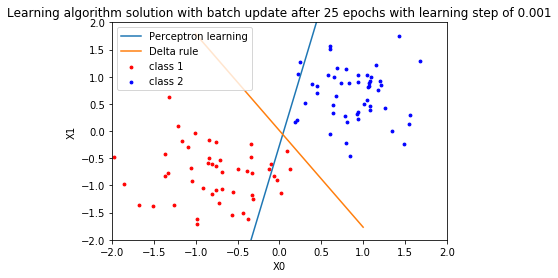

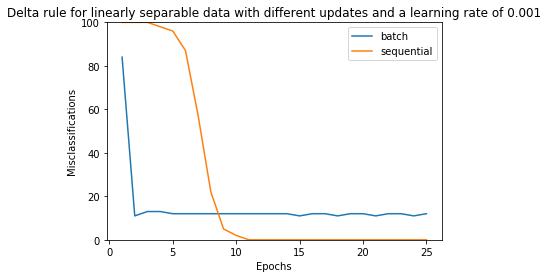

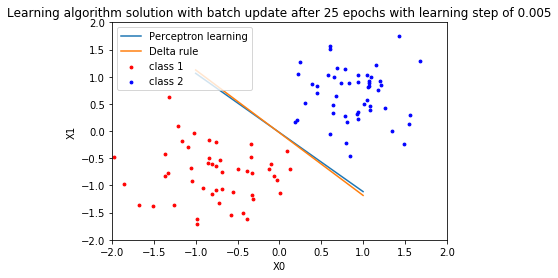

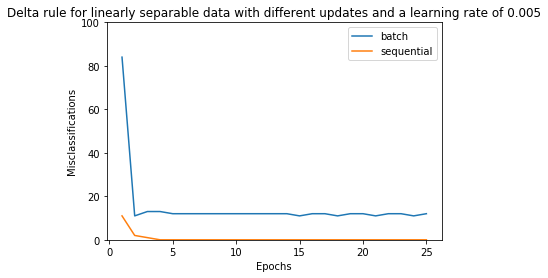

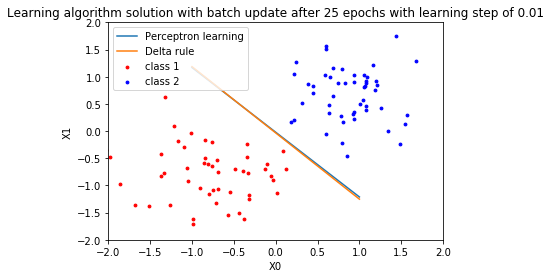

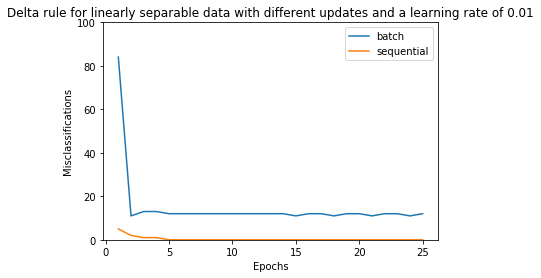

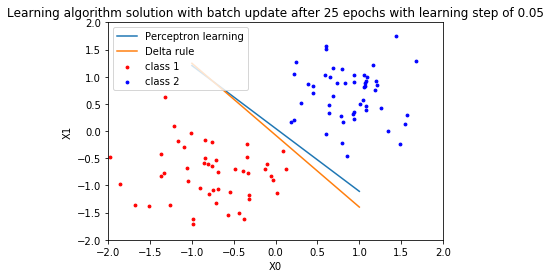

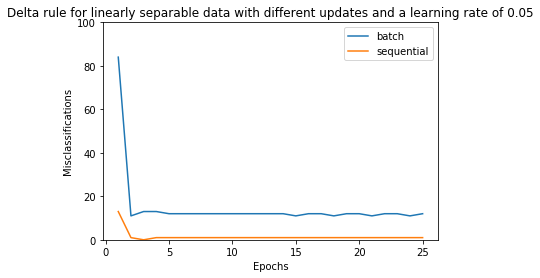

In [661]:
learning_rates = [0.0005,0.001,0.005,0.01,0.05]

for rate in learning_rates:
#     for i in range(10):
    #perceptron
    batch = single_layered_perceptron(lr=rate,update='batch',rule='delta')
    performance, weights = batch.fit(patterns = linsep_data[:,:2], targets = linsep_data[:,2], epochs = 25)
    #decision_boundary(patterns = linsep_data[:,:2], targets = linsep_data[:,2], final_weights = weights[:2], bias = weights[2], rule='Perceptron learning', update='batch',learning_step=rate)
    delta = single_layered_perceptron(lr=rate,update='sequential',rule='delta')
    performance2, weights2 = delta.fit(patterns = linsep_data[:,:2], targets = linsep_data[:,2], epochs = 25)
    decision_boundary(patterns = linsep_data[:,:2], targets = linsep_data[:,2], final_weights1 = weights[:2], bias1 = weights[2], rule1='Perceptron learning',update='batch',learning_step=rate,final_weights2=weights2[:2],bias2=weights2[2],rule2='Delta rule')
    plt.show()
    
    plt.title('Delta rule for linearly separable data with different updates and a learning rate of {}'.format(rate))
    plt.plot(performance1['Epoch'],performance1['Error Metric - Misclassifications'],label='batch')
    plt.plot(performance2['Epoch'],performance2['Error Metric - Misclassifications'],label='sequential')
    plt.ylim(bottom=0,top=100)
    plt.ylabel('Misclassifications')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()

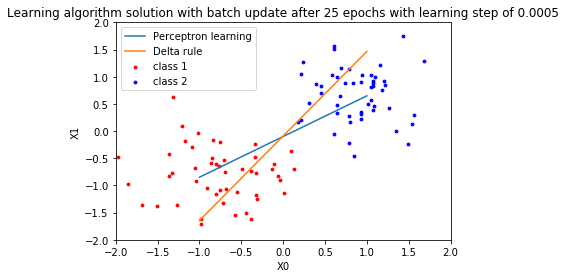

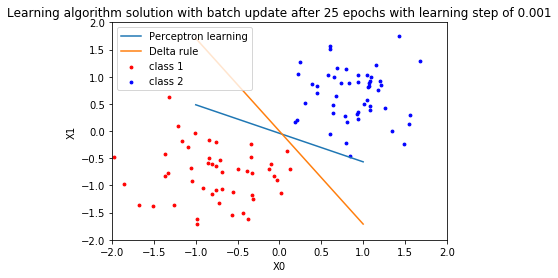

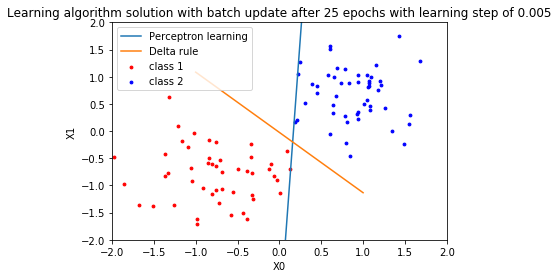

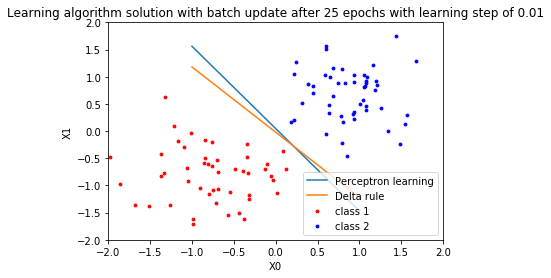

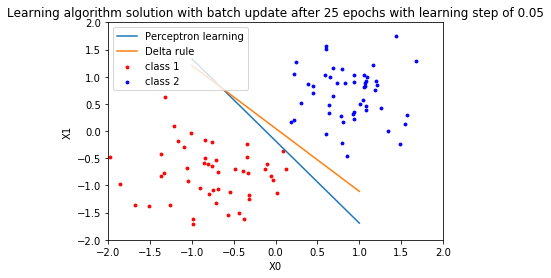

In [653]:
# APPLICATION:

# 3.1.2 a)

# Apply and compare perceptron learning with the Delta learning rule in
# batch mode on the generated dataset. Adjust the learning rate and study
# the convergence of the two algorithms.
learning_rates = [0.0005,0.001,0.005,0.01,0.05]

for rate in learning_rates:
    #perceptron
    batch = single_layered_perceptron(lr=rate,update='batch',rule='delta')
    performance, weights = batch.fit(patterns = linsep_data[:,:2], targets = linsep_data[:,2], epochs = 25)
    #decision_boundary(patterns = linsep_data[:,:2], targets = linsep_data[:,2], final_weights = weights[:2], bias = weights[2], rule='Perceptron learning', update='batch',learning_step=rate)
    delta = single_layered_perceptron(lr=rate,update='sequential',rule='delta')
    performance2, weights2 = delta.fit(patterns = linsep_data[:,:2], targets = linsep_data[:,2], epochs = 25)
    decision_boundary(patterns = linsep_data[:,:2], targets = linsep_data[:,2], final_weights1 = weights[:2], bias1 = weights[2], rule1='Perceptron learning',update='batch',learning_step=rate,final_weights2=weights2[:2],bias2=weights2[2],rule2='Delta rule')
    plt.show()
    
    
    
# for rate in learning_rates:
#     #delta
#     delta = single_layered_perceptron(lr=rate,update='batch',rule='delta')
#     performance, weights = delta.fit(patterns = linsep_data[:,:2], targets = linsep_data[:,2], epochs = 25)
#     print('Delta rule with learning rate ',rate,'\n')
#     decision_boundary(patterns = linsep_data[:,:2], targets = linsep_data[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=rate)
#     print('Performance\n',performance,'\n')

    
    
    


In [516]:
#prints a plot of the learning curve - misclassifications over epochs

def learning_curve(epochs,misclassifications):
    plt.title('Learning curve for {} with {} update and a learning rate of {}'.format('delta rule','batch','rate'))
    plt.plot(performance['Epoch'],performance['Error Metric - Misclassifications'])
    plt.ylabel('Misclassifications')
    plt.xlabel('Epochs')
    plt.show()

(100, 2)
(30,)
(30,)


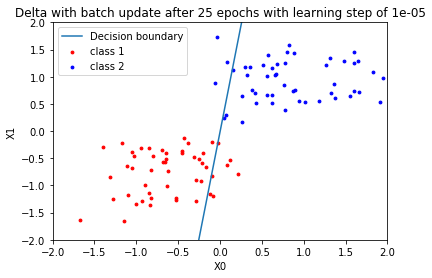

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 92, 92, 92, 91, 91, 91, 91, 91, 91, 91, 90, 90, 90, 90]}


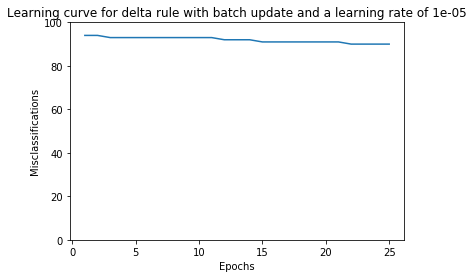

(100, 2)
(30,)
(30,)


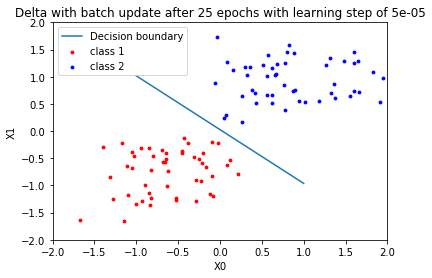

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]}


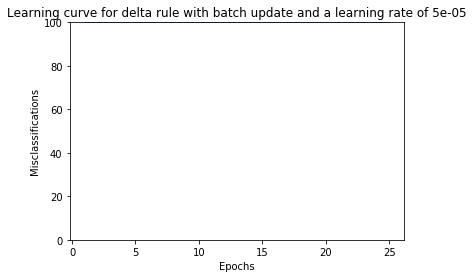

(100, 2)
(30,)
(30,)


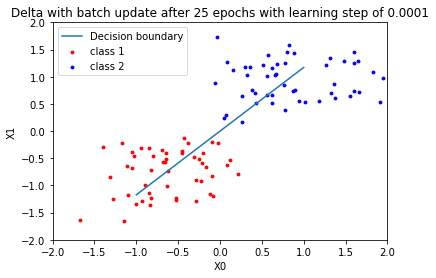

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [77, 76, 73, 72, 72, 72, 72, 72, 71, 69, 67, 64, 64, 61, 60, 59, 59, 58, 56, 56, 55, 55, 53, 51, 51]}


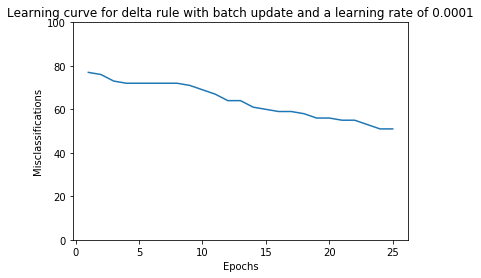

(100, 2)
(30,)
(30,)


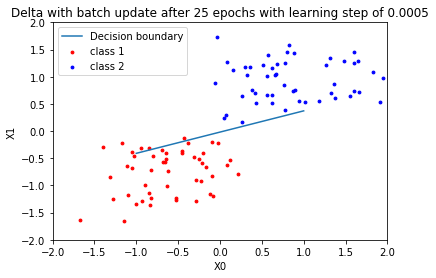

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [98, 97, 95, 95, 93, 88, 86, 81, 77, 71, 63, 59, 53, 48, 43, 35, 34, 29, 26, 24, 22, 16, 13, 9, 7]}


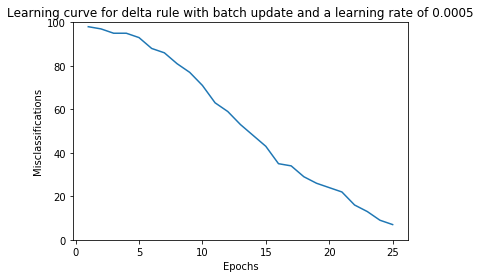

(100, 2)
(30,)
(30,)


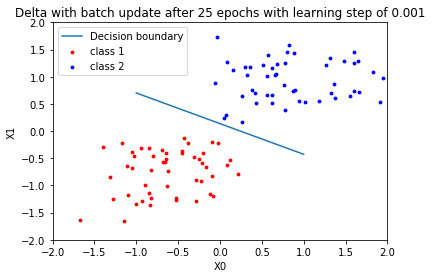

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


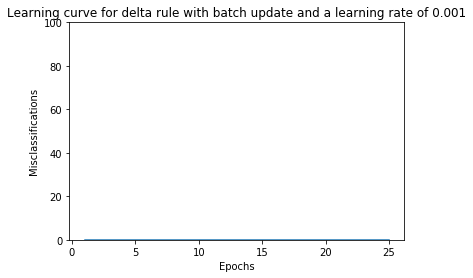

(100, 2)
(30,)
(30,)


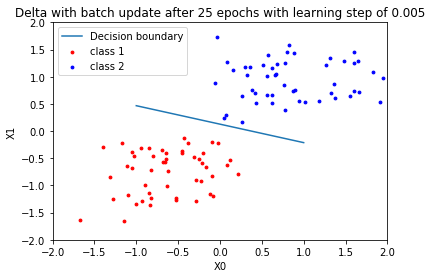

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [12, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


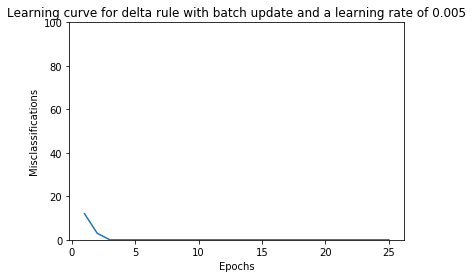

(100, 2)
(30,)
(30,)


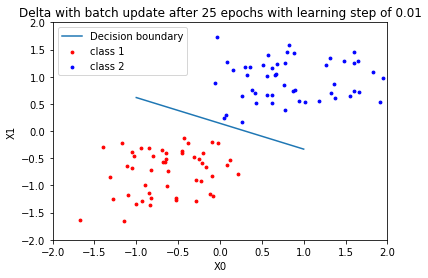

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [100, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


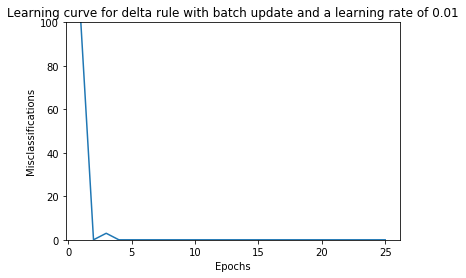

(100, 2)
(30,)
(30,)


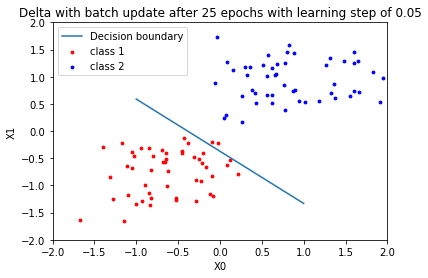

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [100, 0, 100, 1, 98, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98]}


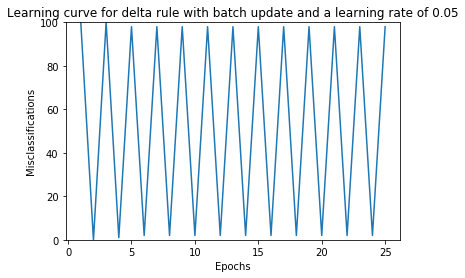

(100, 2)
(30,)
(30,)


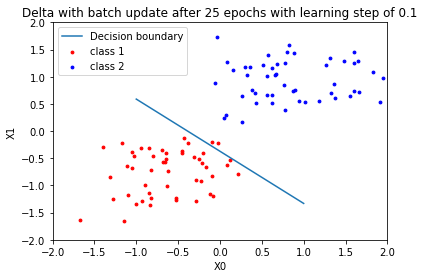

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [0, 0, 100, 0, 99, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98, 2, 98]}


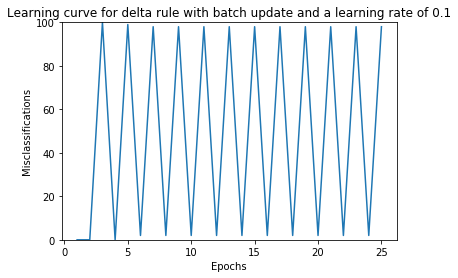

(100, 2)
(30,)
(30,)


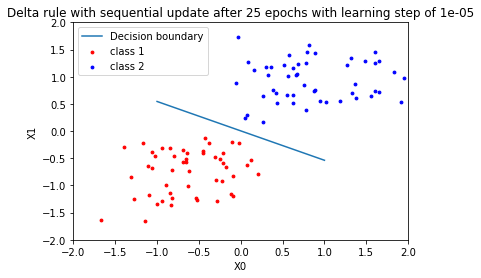

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]}


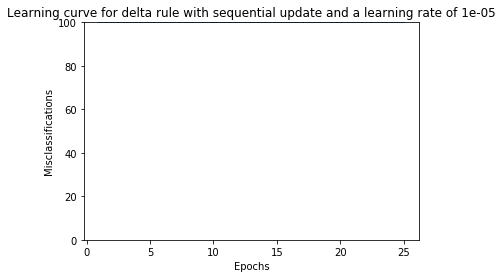

(100, 2)
(30,)
(30,)


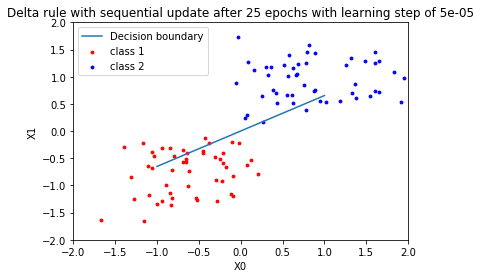

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [31, 31, 31, 29, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 27, 27, 27, 27]}


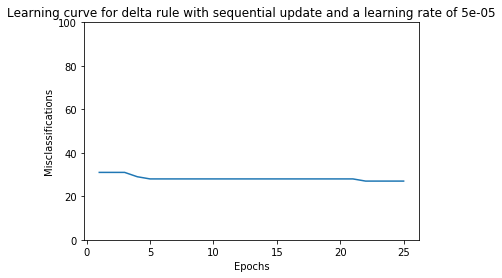

(100, 2)
(30,)
(30,)


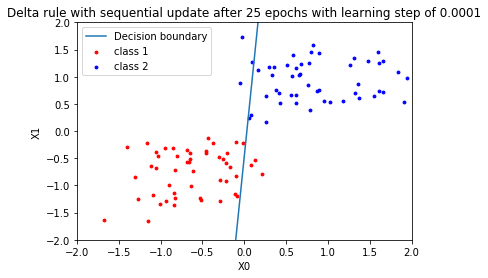

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [99, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 98, 97, 97, 96, 96, 96, 96, 95, 95, 95, 95, 95, 94, 94]}


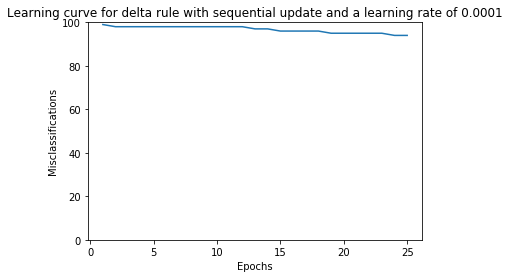

(100, 2)
(30,)
(30,)


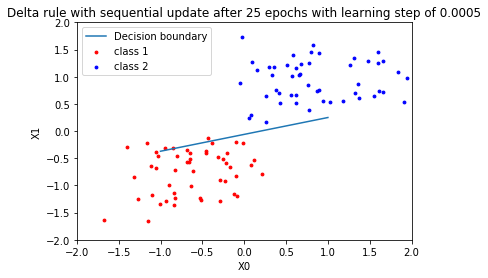

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [100, 100, 100, 100, 100, 100, 100, 99, 97, 95, 92, 91, 86, 80, 72, 64, 59, 45, 37, 33, 25, 19, 12, 8, 7]}


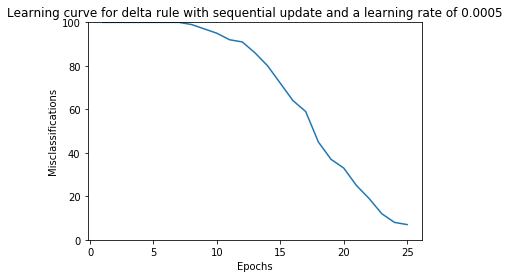

(100, 2)
(30,)
(30,)


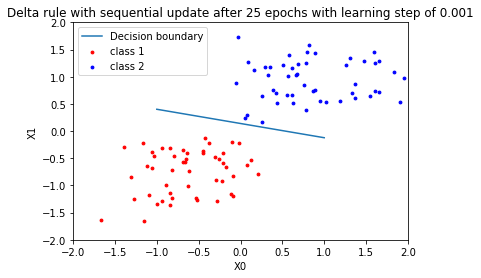

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


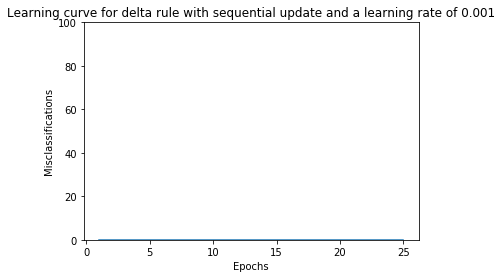

(100, 2)
(30,)
(30,)


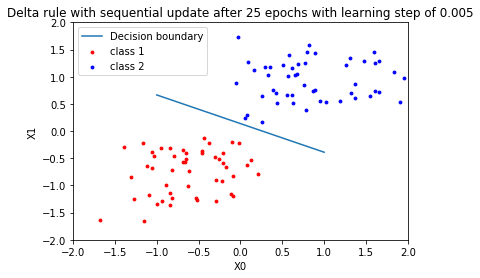

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


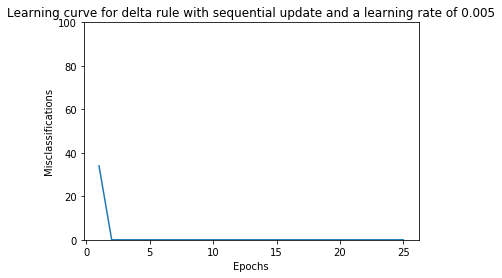

(100, 2)
(30,)
(30,)


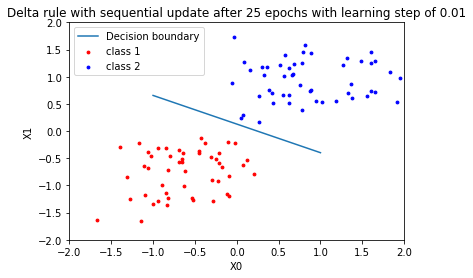

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [62, 25, 12, 7, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


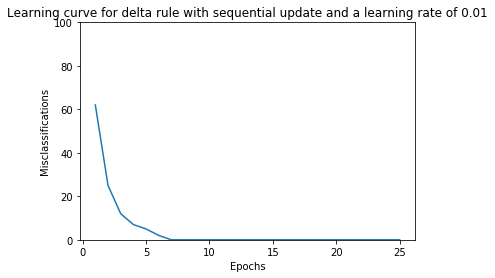

(100, 2)
(30,)
(30,)


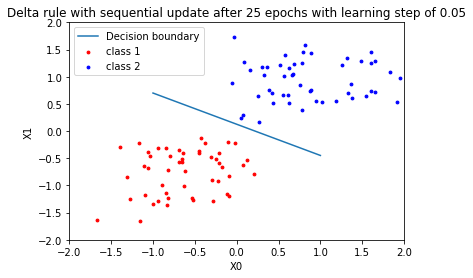

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


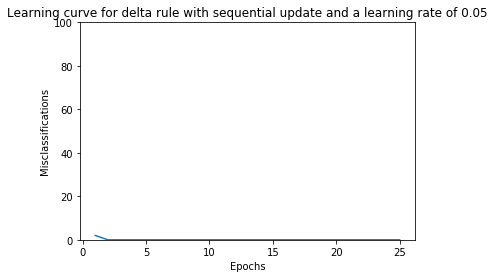

(100, 2)
(30,)
(30,)


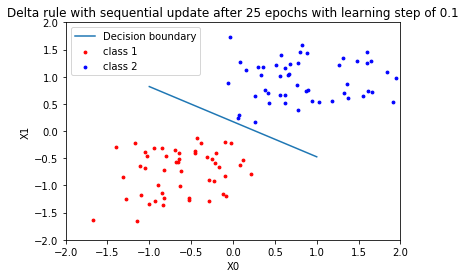

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


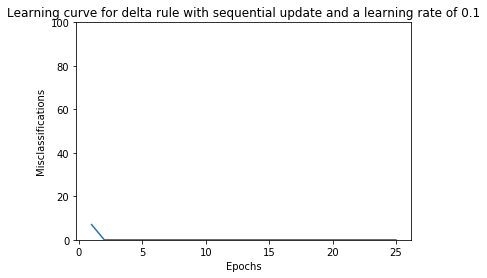

In [528]:
# Compare sequential with a batch learning approach for the Delta rule.
# How quickly (in terms of epochs) do the algorithms converge? Please ad-
# just the learning rate and plot the learning curves for each variant. Bear
# in mind that for sequential learning you should not use the matrix form
# of the learning rule discussed in section 2.2 and instead perform updates
# iteratively for each sample. How sensitive is learning to random initialisa-
# tion?

learning_rates = [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]

for rate in learning_rates:
    #delta
    perceptron = single_layered_perceptron(lr=rate,update='batch',rule='delta')
    performance, weights = perceptron.fit(patterns = linsep_data[:,:2], targets = linsep_data[:,2], epochs = 25)
    #print('Perceptron with learning rate ',rate,'\n')
    decision_boundary(patterns = linsep_data[:,:2], targets = linsep_data[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta', update='batch',learning_step=rate)
    print(performance)
    plt.title('Learning curve for {} with {} update and a learning rate of {}'.format('delta rule','batch',rate))
    plt.plot(performance['Epoch'],performance['Error Metric - Misclassifications'])
    plt.ylim(bottom=0,top=100)
    plt.ylabel('Misclassifications')
    plt.xlabel('Epochs')
    plt.show()
    
for rate in learning_rates:
    #delta
    delta = single_layered_perceptron(lr=rate,update='sequential',rule='delta')
    performance, weights = delta.fit(patterns = linsep_data[:,:2], targets = linsep_data[:,2], epochs = 25)
    #print('Delta rule with learning rate ',rate,'\n')
    decision_boundary(patterns = linsep_data[:,:2], targets = linsep_data[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='sequential',learning_step=rate)
    print(performance)
    plt.title('Learning curve for {} with {} update and a learning rate of {}'.format('delta rule','sequential',rate))
    plt.plot(performance['Epoch'],performance['Error Metric - Misclassifications'])
    plt.ylim(bottom=0,top=100)
    plt.ylabel('Misclassifications')
    plt.xlabel('Epochs')
    plt.show()

    

(100, 2)
(30,)
(30,)


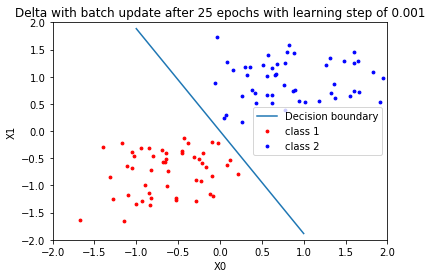

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


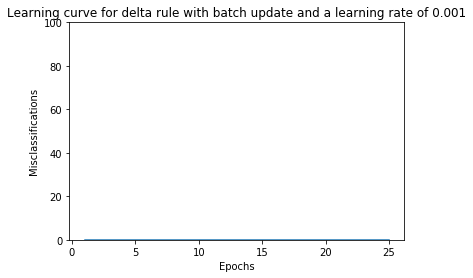

(100, 2)
(30,)
(30,)


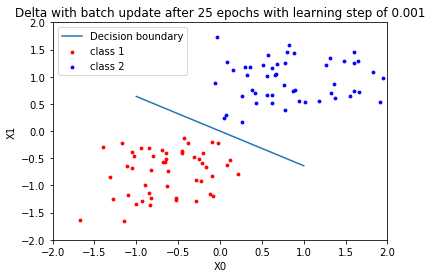

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [100, 100, 100, 100, 100, 100, 98, 44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


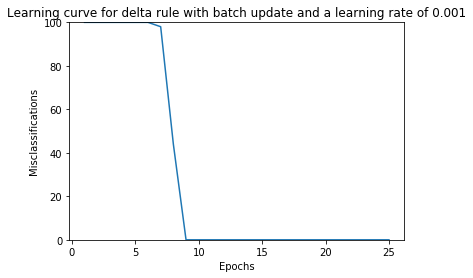

(100, 2)
(30,)
(30,)


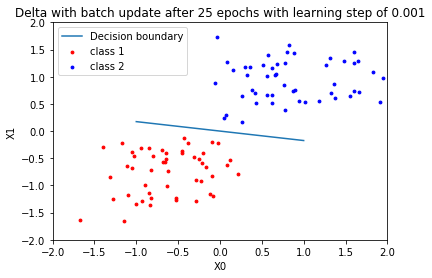

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [89, 75, 55, 40, 24, 10, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


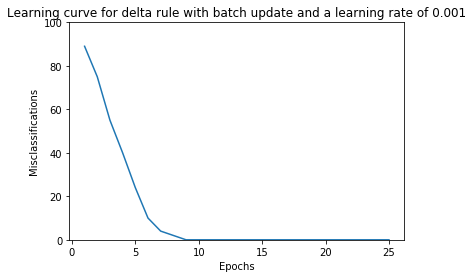

(100, 2)
(30,)
(30,)


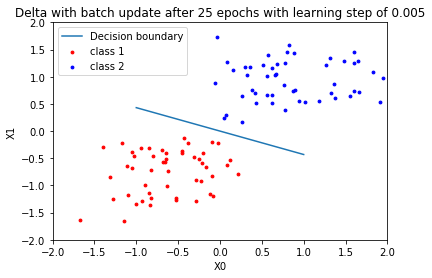

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


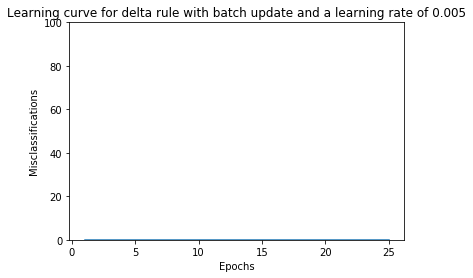

(100, 2)
(30,)
(30,)


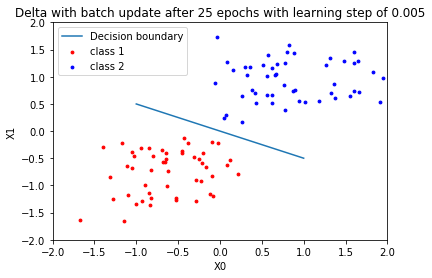

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


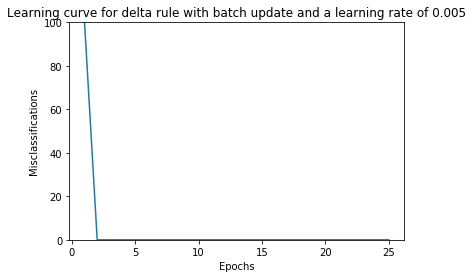

(100, 2)
(30,)
(30,)


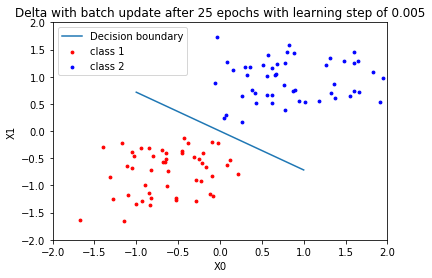

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [93, 26, 11, 7, 5, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


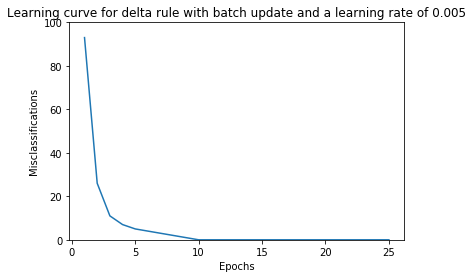

(100, 2)
(30,)
(30,)


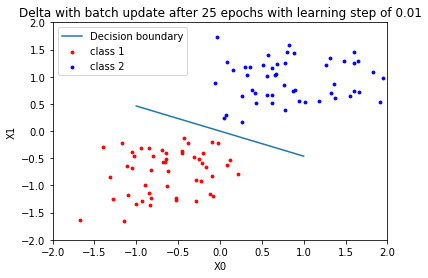

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [100, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


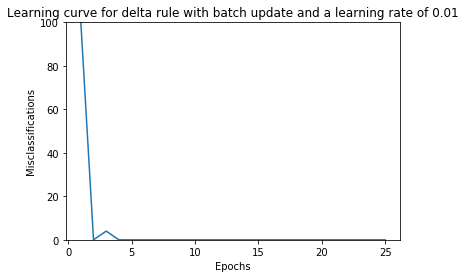

(100, 2)
(30,)
(30,)


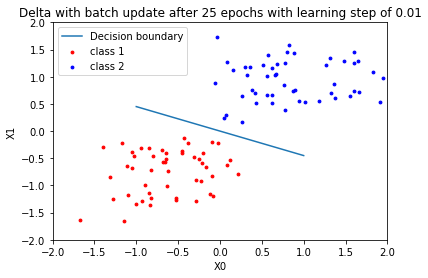

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [98, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


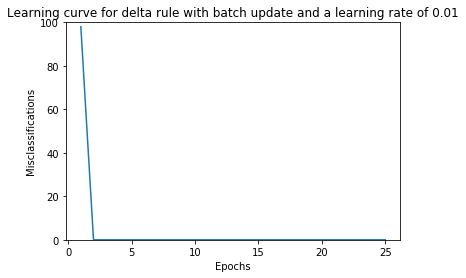

(100, 2)
(30,)
(30,)


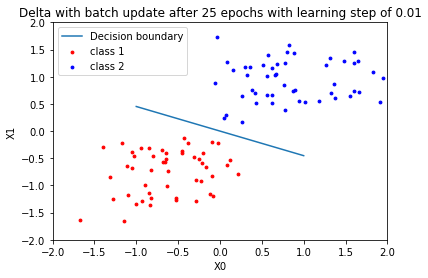

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


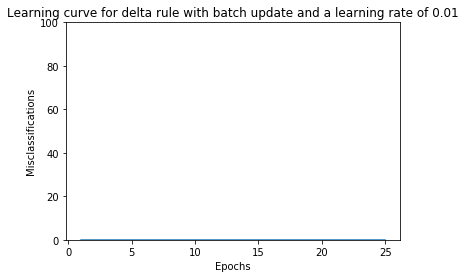

(100, 2)
(30,)
(30,)


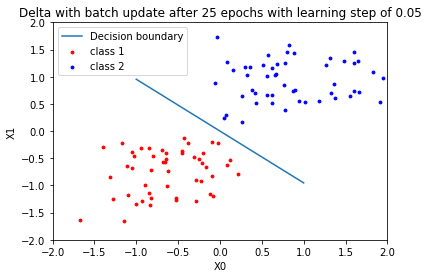

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [36, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100]}


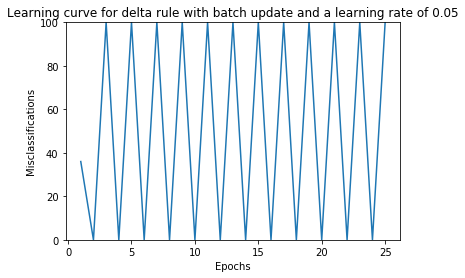

(100, 2)
(30,)
(30,)


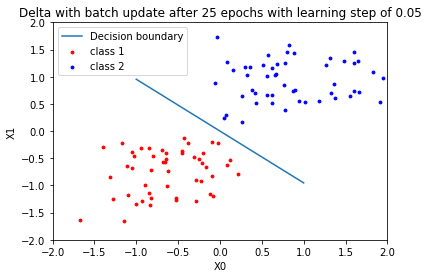

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [0, 0, 0, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100]}


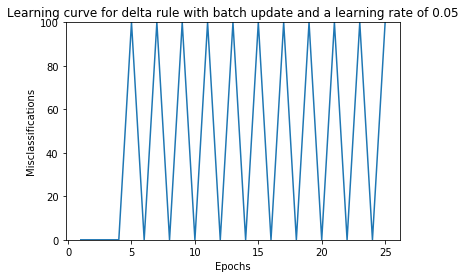

(100, 2)
(30,)
(30,)


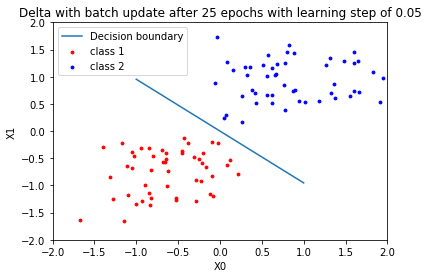

{'Epoch': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], 'Error Metric - Misclassifications': [100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100, 0, 100]}


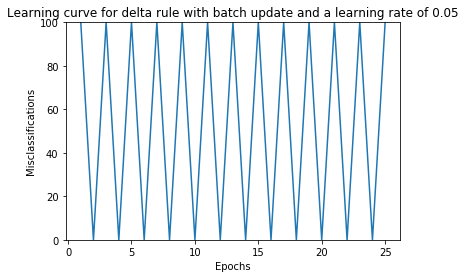

In [530]:
# Remove the bias, train your network with the Delta rule in batch mo-
# de and test its behaviour. In what cases would the perceptron without
# bias converge and classify correctly all data samples? Please verify your
# hypothesis by adjusting data parameters, mA and mB.


# SINGLE LAYER PERCEPTRON CLASS WITH BIAS REMOVED - JUST FOR THIS APPLICATION QUESTION
class single_layered_perceptron():
    """
    Creates a single layer perceptron with 2 inputs and 2 outputs. 
    Change layers and weight&bias initialisation shapes for other input/output dimensions.
    
    Inputs:
    layers = [input,output] ie dxo
    update = 'batch' or 'sequential' learning
    learning = 'delta' rule or 'perceptron' rule
    lr = learning rate
    weights = init by randomly sampled around 0 with std dev 1
    bias = init as 0s
    """
    
    # nxo = (nx(d+1)) x ((d+1)xo)
    # Y = X x W
    
    def __init__(self, layers=[2,1], lr=.005, update='batch', rule='perceptron'):
        
        self.layers=layers
        self.lr=lr
        self.learning_rule=rule
        self.update = update
        # dxo
        weights=np.random.normal(0,1,(layers[0],layers[1]))
        # 1xo
        bias=np.zeros((1,layers[1]))
        # (d+1)xo
        #self.weights = np.append(weights, bias, axis=0) # add weights of bias
        self.weights = weights
        
    def rule(self,y_hat,targets):
        
        if (self.learning_rule=='perceptron'):
            
            #make prediction using step function
            pred = (y_hat>=0)*1 # 0/1 predictions
            pred = np.where(pred==0, -1, pred) #-1/1 predictions
            # different error calculation because single (1x1) target value creates some bugs
            if type(targets) is np.float64:
                error = targets-pred
            else:
                error = np.subtract(targets.reshape(targets.shape[0],self.layers[1]), pred)
            misclassifications = np.count_nonzero(error)
            
            return error, misclassifications
            
        
        if (self.learning_rule=='delta'):
            
            
            #count misclassifications for comparison - same as preceptron learning 
            pred = (y_hat>=0)*1 # 0/1 predictions
            pred = np.where(pred==0, -1, pred) #-1/1 predictions

            if type(targets) is np.float64:
                misclass = targets-pred
            else:
                misclass = np.subtract(targets.reshape(targets.shape[0],self.layers[1]), pred)
            misclassifications = np.count_nonzero(misclass)
            
            
            #error calculation for delta
            # different error calculation because single (1x1) target value creates some bugs
            if type(targets) is np.float64:
                error = targets-y_hat
                #print(error)
            else:
                error = np.subtract(targets.reshape(targets.shape[0],self.layers[1]), y_hat)
                #print(error.shape)
                #print(error)
                #print('error shape\n',error.shape)
            #calc mean squared error
            mse = (np.mean(error,axis=0))**2
            
            return error, misclassifications
            
        else: #change to raise ValError
            raise ValueError("Error - please use 'perceptron' or 'delta' as learning rule parameter.")
        
    def fit(self,patterns,targets,epochs):
        """
        patterns is X data (nxd)
        targets is Y labels (nx1)
        epochs is number of training iterations (int)
        """
        #n x (d+1)
        #self.patterns = np.append(patterns, np.ones((patterns.shape[0],1)),axis=1)
        self.patterns = patterns
        self.targets = targets
        
        if self.update=='batch':
            #for each bach
            performance = {'Epoch':[], 'Error Metric - Misclassifications':[] }
            for i in range(epochs):
                #predict
                y_hat = np.dot(self.patterns,self.weights)
                
                # calc error: either delta or perceptron rule
                error, error_metric = self.rule(y_hat,self.targets)
                
                #store results
                performance['Epoch'].append(i+1)
                performance['Error Metric - Misclassifications'].append(error_metric)
                
                # update weights
                # (d+1)xo = (d+1)xo + lr*((oxn)*nx(d+1)).T
                # print('error.T\n',error.T.shape)
                # print('patterns\n',self.patterns)
                self.weights = self.weights + self.lr * (np.dot(error.T, self.patterns)).T
                # print('WEIGHTS\n',self.weights)
                
            return performance,self.weights
                
            
            
        if self.update=='sequential':
            
            performance = {'Epoch':[], 'Error Metric - Misclassifications':[] }
            for i in range(epochs):
                #for each sample
                errormetric_per_epoch = []
                for j,sample in enumerate(self.patterns):
                    #predict
                    y_hat = np.dot(sample,self.weights)
                    
                    # calc error: either delta or perceptron rule
                    error, error_metric= self.rule(y_hat,self.targets[j])
                    #print(error.shape)
                    errormetric_per_epoch.append(error_metric)
        
                    #update weights
                    self.weights = self.weights + self.lr * (np.dot(error.reshape(error.shape[0],self.layers[1]).T, sample.reshape(1,self.patterns.shape[1]))).T
                    
                
                # convert to sample errors to error metric depending on rule
                if self.learning_rule=='delta':
                    #errormetric_per_epoch = np.mean(errormetric_per_epoch)
                    errormetric_per_epoch = np.count_nonzero(errormetric_per_epoch)
                if self.learning_rule=='perceptron':
                    errormetric_per_epoch = np.count_nonzero(errormetric_per_epoch)
                
                #store results
                performance['Error Metric - Misclassifications'].append(errormetric_per_epoch)
                performance['Epoch'].append(i+1)
        
            return performance,self.weights
            
        else:
            raise ValueError("Error - please use 'perceptron' or 'delta' as learning rule parameter.")
            

        
        
    
# LOOK AT PERFORMANCE WITHOUT BIAS
# convergence is achieved when a good decision boundary goes through / very close to the origin point. y=Wx+b, where b=0


learning_rates = [0.001,0.001,0.001,0.005,0.005,0.005,0.01,0.01,0.01,0.05,0.05,0.05]

for rate in learning_rates:
    #delta
    perceptron = single_layered_perceptron(lr=rate,update='batch',rule='delta')
    performance, weights = perceptron.fit(patterns = linsep_data[:,:2], targets = linsep_data[:,2], epochs = 25)
    #print('Perceptron with learning rate ',rate,'\n')
    decision_boundary(patterns = linsep_data[:,:2], targets = linsep_data[:,2], final_weights = weights, bias = 0, rule='Delta', update='batch',learning_step=rate)
    print(performance)
    plt.title('Learning curve for {} with {} update and a learning rate of {}'.format('delta rule','batch',rate))
    plt.plot(performance['Epoch'],performance['Error Metric - Misclassifications'])
    plt.ylim(bottom=0,top=100)
    plt.ylabel('Misclassifications')
    plt.xlabel('Epochs')
    plt.show()


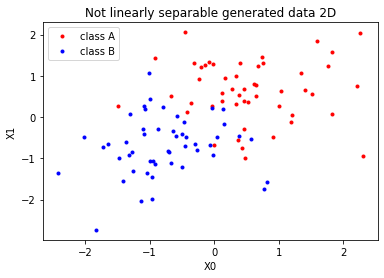

In [538]:
nonsep_data = nonlin_sep_data(sigmaA=0.7,sigmaB=0.7)

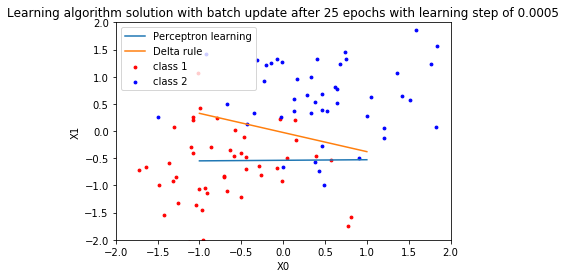

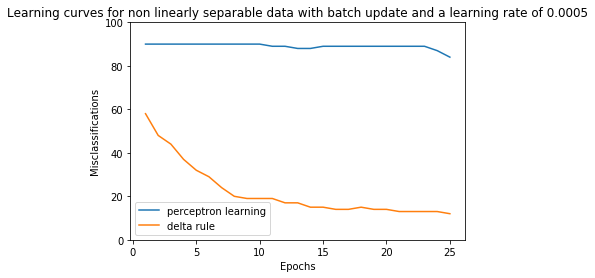

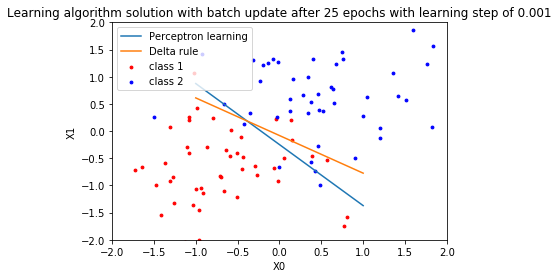

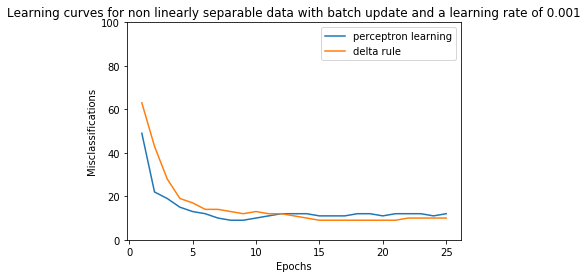

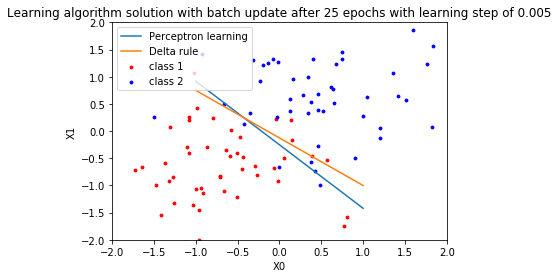

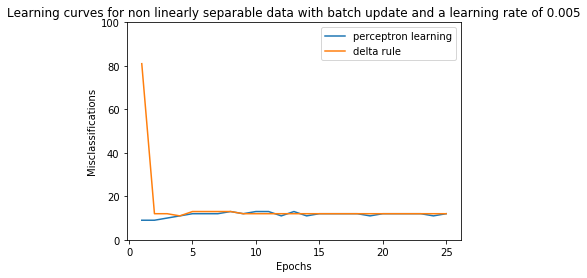

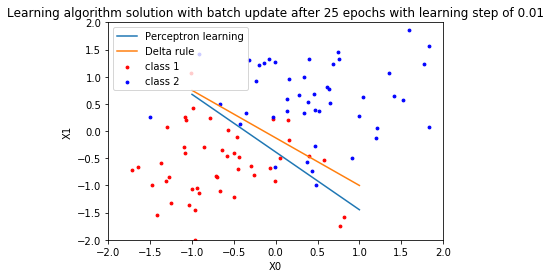

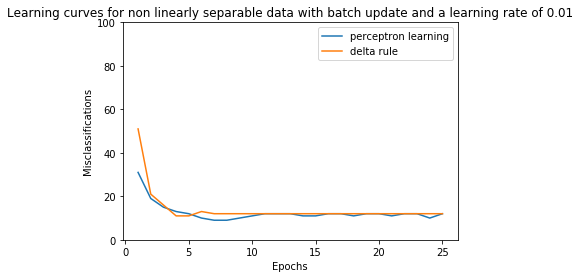

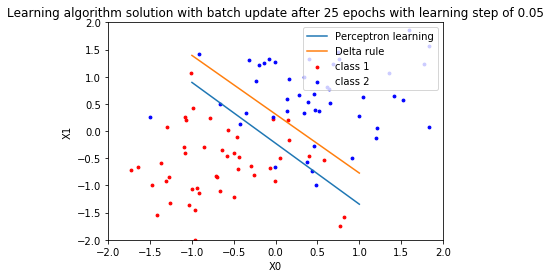

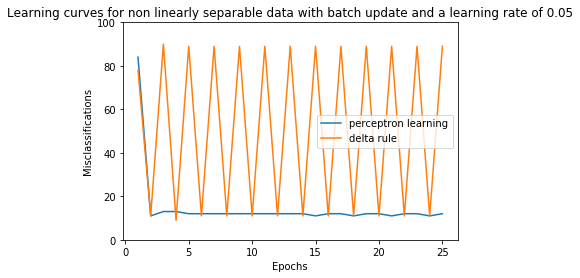

In [659]:
# 3.1.3 a)

# Apply and compare perceptron learning with the Delta learning rule in
# batch mode on the non-lin sep generated dataset. Adjust the learning rate and study
# the convergence of the two algorithms.

learning_rates = [0.0005,0.001,0.005,0.01,0.05]

for rate in learning_rates:
    #perceptron
    perceptron = single_layered_perceptron(lr=rate,update='batch',rule='perceptron')
    performance1, weights1 = perceptron.fit(patterns = nonsep_data[:,:2], targets = nonsep_data[:,2], epochs = 25)
    #decision_boundary(patterns = nonsep_data[:,:2], targets = nonsep_data[:,2], final_weights = weights[:2], bias = weights[2], rule='Perceptron learning', update='batch',learning_step=rate)
    delta = single_layered_perceptron(lr=rate,update='batch',rule='delta')
    performance2, weights2 = delta.fit(patterns = nonsep_data[:,:2], targets = nonsep_data[:,2], epochs = 25)
    decision_boundary(patterns = nonsep_data[:,:2], targets = nonsep_data[:,2], final_weights1 = weights1[:2], bias1 = weights1[2], rule1='Perceptron learning', update='batch',learning_step=rate, final_weights2 = weights2[:2], bias2 = weights2[2], rule2='Delta rule')
    plt.show()
    
    plt.title('Learning curves for non linearly separable data with {} update and a learning rate of {}'.format('batch',rate))
    plt.plot(performance1['Epoch'],performance1['Error Metric - Misclassifications'],label='perceptron learning')
    plt.plot(performance2['Epoch'],performance2['Error Metric - Misclassifications'],label='delta rule')
    plt.ylim(bottom=0,top=100)
    plt.ylabel('Misclassifications')
    plt.xlabel('Epochs')
    plt.legend()
    plt.show()
    
# for rate in learning_rates:
#     #delta
#     delta = single_layered_perceptron(lr=rate,update='batch',rule='delta')
#     performance, weights = delta.fit(patterns = nonsep_data[:,:2], targets = nonsep_data[:,2], epochs = 25)
#     decision_boundary(patterns = nonsep_data[:,:2], targets = nonsep_data[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=rate)
#     plt.title('Learning curve for {} with {} update and a learning rate of {}'.format('delta rule','batch',rate))
#     plt.plot(performance['Epoch'],performance['Error Metric - Misclassifications'])
#     plt.ylim(bottom=0,top=100)
#     plt.ylabel('Misclassifications')
#     plt.xlabel('Epochs')
#     plt.show()

    
    
    


(50, 1)
(50, 2)


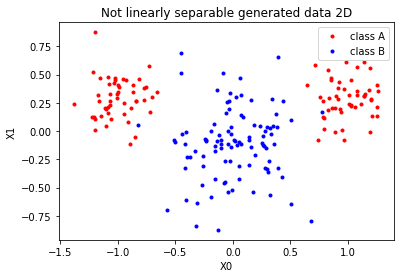

In [600]:
nonsep_data2 = nonlin_sep_data_part2(n=200)

In [601]:

# creates a random sampled subset of 2 class dataset data, removing a given % from each class
def random_subset(data, perc_A_removed=0, perc_B_removed=0):
    
    #dataA = data[np.where(data.T[2]==1)]
    dataA = data[np.where(data.T[2]==1)]
    dataB = data[np.where(data.T[2]==-1)]
    print(dataA.shape)
    print(dataB.shape)
    #dataB = data[np.where()]
    idxA = np.random.choice(dataA.shape[0],(100-perc_A_removed)*dataA.shape[0]//100)
    idxB = np.random.choice(dataB.shape[0],(100-perc_B_removed)*dataB.shape[0]//100)
    #idx = np.random.choice(data.shape[0],subset_size*data.shape[0]//100)
    data = np.append(dataA[idxA],dataB[idxB],axis=0)
    np.random.shuffle(data)
    
    return data

test = random_subset(nonsep_data2, 25,25)
test.shape

(100, 3)
(100, 3)


(150, 3)

In [663]:
# CHANGED TO RETURN Y_HAT, TO ALLOW FOR ROC CURVE TO BE PLOTTED, BECAUSe IMBALANCED DATASET FOR THIS APPLICATION QUESTION

class single_layered_perceptron():
    """
    Creates a single layer perceptron with 2 inputs and 2 outputs. 
    Change layers and weight&bias initialisation shapes for other input/output dimensions.
    
    Inputs:
    layers = [input,output] ie dxo
    update = 'batch' or 'sequential' learning
    learning = 'delta' rule or 'perceptron' rule
    lr = learning rate
    weights = init by randomly sampled around 0 with std dev 1
    bias = init as 0s
    """
    
    # nxo = (nx(d+1)) x ((d+1)xo)
    # Y = X x W
    
    def __init__(self, layers=[2,1], lr=.005, update='batch', rule='perceptron'):
        
        self.layers=layers
        self.lr=lr
        self.learning_rule=rule
        self.update = update
        # dxo
        weights=np.random.normal(0,1,(layers[0],layers[1]))
        # 1xo
        bias=np.zeros((1,layers[1]))
        # (d+1)xo
        self.weights = np.append(weights, bias, axis=0) # add weights of bias
        
    def rule(self,y_hat,targets):
        
        if (self.learning_rule=='perceptron'):
            
            #make prediction using step function
            pred = (y_hat>=0)*1 # 0/1 predictions
            pred = np.where(pred==0, -1, pred) #-1/1 predictions
            # different error calculation because single (1x1) target value creates some bugs
            if type(targets) is np.float64:
                error = targets-pred
            else:
                error = np.subtract(targets.reshape(targets.shape[0],self.layers[1]), pred)
            misclassifications = np.count_nonzero(error)
            
            return error, misclassifications
            
        
        if (self.learning_rule=='delta'):
            
            
            #count misclassifications for comparison - same as preceptron learning 
            pred = (y_hat>=0)*1 # 0/1 predictions
            pred = np.where(pred==0, -1, pred) #-1/1 predictions

            if type(targets) is np.float64:
                misclass = targets-pred
            else:
                misclass = np.subtract(targets.reshape(targets.shape[0],self.layers[1]), pred)
            misclassifications = np.count_nonzero(misclass)
            
            
            #error calculation for delta
            # different error calculation because single (1x1) target value creates some bugs
            if type(targets) is np.float64:
                error = targets-y_hat
                #print(error)
            else:
                error = np.subtract(targets.reshape(targets.shape[0],self.layers[1]), y_hat)
                #print(error.shape)
                #print(error)
                #print('error shape\n',error.shape)
            #calc mean squared error
            mse = (np.mean(error,axis=0))**2
            
            return error, misclassifications
            
        else: #change to raise ValError
            raise ValueError("Error - please use 'perceptron' or 'delta' as learning rule parameter.")
        
    def fit(self,patterns,targets,epochs):
        """
        patterns is X data (nxd)
        targets is Y labels (nx1)
        epochs is number of training iterations (int)
        """
        #n x (d+1)
        self.patterns = np.append(patterns, np.ones((patterns.shape[0],1)),axis=1)
        self.targets = targets
        
        if self.update=='batch':
            #for each bach
            performance = {'Epoch':[], 'Error Metric - Misclassifications':[], 'Predictions':[] }
            for i in range(epochs):
                #predict
                y_hat = np.dot(self.patterns,self.weights)
                
                # calc error: either delta or perceptron rule
                error, error_metric = self.rule(y_hat,self.targets)
                
                #store results
                performance['Epoch'].append(i+1)
                performance['Error Metric - Misclassifications'].append(error_metric)
                
                
                # update weights
                # (d+1)xo = (d+1)xo + lr*((oxn)*nx(d+1)).T
                # print('error.T\n',error.T.shape)
                # print('patterns\n',self.patterns)
                self.weights = self.weights + self.lr * (np.dot(error.T, self.patterns)).T
                # print('WEIGHTS\n',self.weights)
            performance['Predictions'].append(y_hat)
                
            return performance,self.weights
                
            
            
        if self.update=='sequential':
            
            performance = {'Epoch':[], 'Error Metric - Misclassifications':[] }
            for i in range(epochs):
                #for each sample
                errormetric_per_epoch = []
                for j,sample in enumerate(self.patterns):
                    #predict
                    y_hat = np.dot(sample,self.weights)
                    
                    # calc error: either delta or perceptron rule
                    error, error_metric= self.rule(y_hat,self.targets[j])
                    #print(error.shape)
                    errormetric_per_epoch.append(error_metric)
        
                    #update weights
                    self.weights = self.weights + self.lr * (np.dot(error.reshape(error.shape[0],self.layers[1]).T, sample.reshape(1,self.patterns.shape[1]))).T
                    
                
                # convert to sample errors to error metric depending on rule
                if self.learning_rule=='delta':
                    #errormetric_per_epoch = np.mean(errormetric_per_epoch)
                    errormetric_per_epoch = np.count_nonzero(errormetric_per_epoch)
                if self.learning_rule=='perceptron':
                    errormetric_per_epoch = np.count_nonzero(errormetric_per_epoch)
                
                #store results
                performance['Error Metric - Misclassifications'].append(errormetric_per_epoch)
                performance['Epoch'].append(i+1)
        
            return performance,self.weights
            
        else:
            raise ValueError("Error - please use 'perceptron' or 'delta' as learning rule parameter.")
            

        
        
    

(200, 2)
(30,)
(30,)


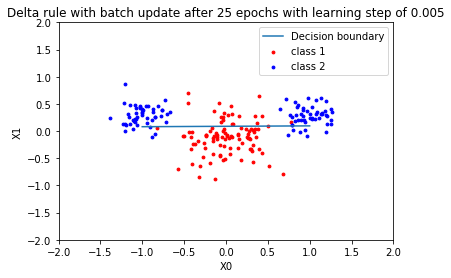

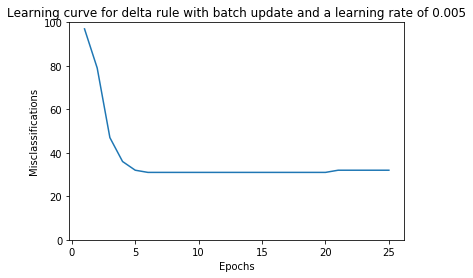

(100, 3)
(100, 3)
(150, 2)
(30,)
(30,)


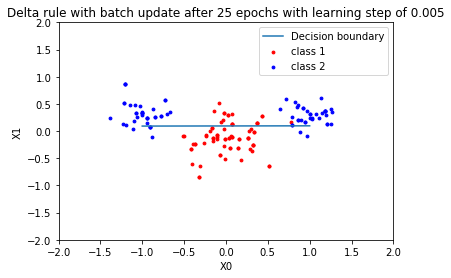

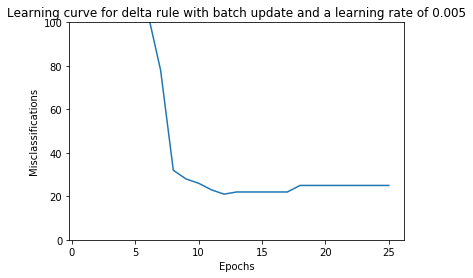

(100, 3)
(100, 3)
(150, 2)
(30,)
(30,)


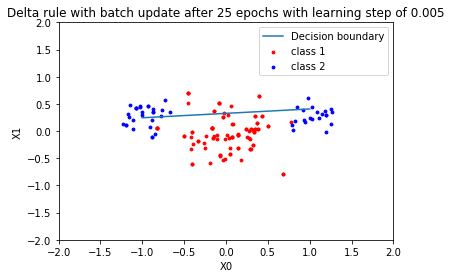

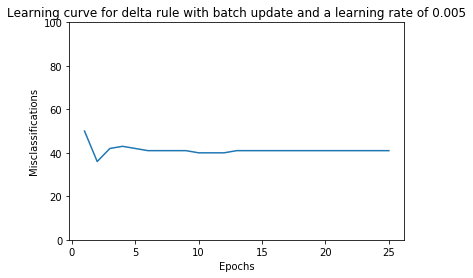

(100, 3)
(100, 3)
(175, 2)
(30,)
(30,)


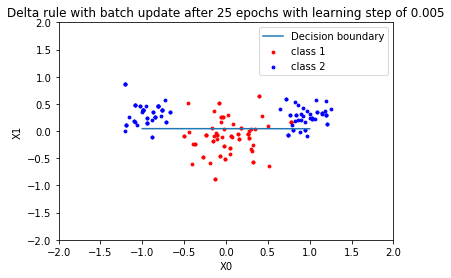

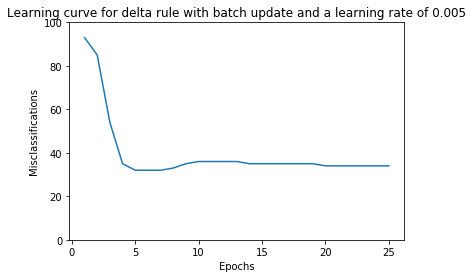

(50, 3)
(0, 3)
(50, 3)
(0, 3)
(150, 2)
(30,)
(30,)


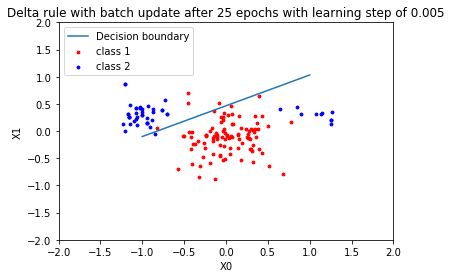

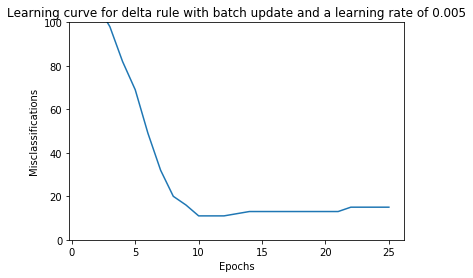

In [614]:
#3.1.3b)

# apply the Delta learning rule in batch mode to this new dataset as well
# as to different versions of the subsampled data, i.e. before training please remo-
# ve 25% of data samples (for two classes with n=100 samples each, remove 50
# samples) according to the following scenarios:

#delta batch
delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance, weights = delta.fit(patterns = nonsep_data2[:,:2], targets = nonsep_data2[:,2], epochs = 25)
decision_boundary(patterns = nonsep_data2[:,:2], targets = nonsep_data2[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
plt.title('Learning curve for {} with {} update and a learning rate of {}'.format('delta rule','batch',0.005))
plt.plot(performance['Epoch'],performance['Error Metric - Misclassifications'])
plt.ylim(bottom=0,top=100)
plt.ylabel('Misclassifications')
plt.xlabel('Epochs')
plt.show()




# 25% from each class
subset = random_subset(nonsep_data2,25,25)

delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
plt.title('Learning curve for {} with {} update and a learning rate of {}'.format('delta rule','batch',0.005))
plt.plot(performance['Epoch'],performance['Error Metric - Misclassifications'])
plt.ylim(bottom=0,top=100)
plt.ylabel('Misclassifications')
plt.xlabel('Epochs')
plt.show()

# random 50% from classA
subset = random_subset(nonsep_data2,50)

delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
plt.title('Learning curve for {} with {} update and a learning rate of {}'.format('delta rule','batch',0.005))
plt.plot(performance['Epoch'],performance['Error Metric - Misclassifications'])
plt.ylim(bottom=0,top=100)
plt.ylabel('Misclassifications')
plt.xlabel('Epochs')
plt.show()

# random 50% from class B
subset = random_subset(nonsep_data2,0,25)

delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
plt.title('Learning curve for {} with {} update and a learning rate of {}'.format('delta rule','batch',0.005))
plt.plot(performance['Epoch'],performance['Error Metric - Misclassifications'])
plt.ylim(bottom=0,top=100)
plt.ylabel('Misclassifications')
plt.xlabel('Epochs')
plt.show()

# 20% from a subset of classA for which classA(1,:)<0 and 80% from a
# subset of classA for which classA(1,:)>0
dataA1 = nonsep_data2[np.where((nonsep_data2.T[2]==1)&(nonsep_data2.T[0]<0))]
dataA2 = nonsep_data2[np.where((nonsep_data2.T[2]==1)&(nonsep_data2.T[0]>0))]
subsetA1 = random_subset(dataA1,20)
subsetA2 = random_subset(dataA2,80)
dataB= nonsep_data2[np.where(nonsep_data2.T[2]==-1)]
subset = np.append(np.append(subsetA1,subsetA2,axis=0),dataB,axis=0)
np.random.shuffle(subset)


delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
plt.title('Learning curve for {} with {} update and a learning rate of {}'.format('delta rule','batch',0.005))
plt.plot(performance['Epoch'],performance['Error Metric - Misclassifications'])
plt.ylim(bottom=0,top=100)
plt.ylabel('Misclassifications')
plt.xlabel('Epochs')
plt.show()

In [668]:

#plots a decision boundary based on the y = formula
def decision_boundary(patterns,targets, final_weights1, bias1, rule1, update, learning_step, final_weights2, bias2, rule2,auc1,auc2):
    
        #visualise
#     plt.plot(A[:, 0], A[:, 1], 'r.',label='class A')
#     plt.plot(B[:, 0], B[:, 1], 'b.',label='class B')
    
#     graph(lambda x: (final_weights.T*x)+bias, range(-2, 2))
    x = np.linspace(-1,1,30)
    #print(patterns.shape)
    y1 = -(final_weights1[0]*x+bias1)/final_weights1[1]
    y2 = -(final_weights2[0]*x+bias2)/final_weights2[1]
    #print(y.shape)
    #print(x.shape)
    plt.plot(x, y1,label='{}'.format(rule1))
    plt.plot(x, y2,label='{}'.format(rule2))
    plt.xlim(left=-2,right=2)
    plt.ylim(bottom=-2,top=2)
    #graph(lambda x: (np.dot(final_weights.T,x))+bias)
    
    colormap = np.array(['r', 'b'])
    
    red = np.where(targets==-1)
    blue = np.where(targets==1)
    #print(red)
    #print(patterns.shape)
    
    plt.scatter(patterns.T[0][red],patterns.T[1][red],c='r',label='class 1',s=8)
    plt.scatter(patterns.T[0][blue],patterns.T[1][blue],c='b',label='class 2',s=8)
    
    #plt.plot(patterns.)
    #plt.xlabel('potential [uV] in {} at {} ms'.format(chans[0], time_points[0]))
    plt.title('Delta rule solution using the full dataset (AUC score {}) and a bias sampled subset (AUC score {}).'.format(auc1,auc2))
    plt.xlabel('X0')
    plt.ylabel('X1')
    plt.legend()
    #plt.show()


(50, 3)
(0, 3)
(50, 3)
(0, 3)


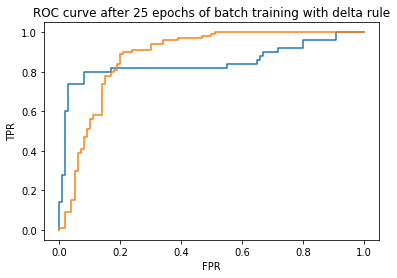

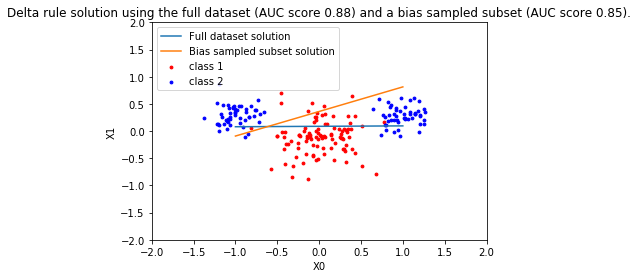

In [675]:
#3.1.3b)

# apply the Delta learning rule in batch mode to this new dataset as well
# as to different versions of the subsampled data, i.e. before training please remo-
# ve 25% of data samples (for two classes with n=100 samples each, remove 50
# samples) according to the following scenarios:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#delta batch
delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance, weights = delta.fit(patterns = nonsep_data2[:,:2], targets = nonsep_data2[:,2], epochs = 25)
#decision_boundary(patterns = nonsep_data2[:,:2], targets = nonsep_data2[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
fpr1, tpr1, _ = roc_curve(nonsep_data2[:,2],np.reshape(performance['Predictions'],(nonsep_data2[:,2].shape[0],1)))
auc1=auc(fpr1, tpr1)



# 20% from a subset of classA for which classA(1,:)<0 and 80% from a
# subset of classA for which classA(1,:)>0
dataA1 = nonsep_data2[np.where((nonsep_data2.T[2]==1)&(nonsep_data2.T[0]<0))]
dataA2 = nonsep_data2[np.where((nonsep_data2.T[2]==1)&(nonsep_data2.T[0]>0))]
subsetA1 = random_subset(dataA1,20)
subsetA2 = random_subset(dataA2,80)
dataB= nonsep_data2[np.where(nonsep_data2.T[2]==-1)]
subset = np.append(np.append(subsetA1,subsetA2,axis=0),dataB,axis=0)
np.random.shuffle(subset)


delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance2, weights2 = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
fpr, tpr, _ = roc_curve(subset[:,2],np.reshape(performance2['Predictions'],(subset[:,2].shape[0],1)))
auc2=auc(fpr,tpr)

plt.plot(fpr,tpr,label='Full dataset')
plt.plot(fpr1,tpr1,label='Bias sampled subset')
plt.title('ROC curve after 25 epochs of batch training with delta rule')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


decision_boundary(patterns = nonsep_data2[:,:2], targets = nonsep_data2[:,2], final_weights1 = weights[:2], bias1 = weights[2], rule1='Full dataset solution',update='batch',learning_step=0.005,final_weights2=weights2[:2],bias2=weights2[2],rule2='Bias sampled subset solution',auc1=np.round(auc1,2),auc2=np.round(auc2,2))
plt.show()


(200, 2)
(30,)
(30,)


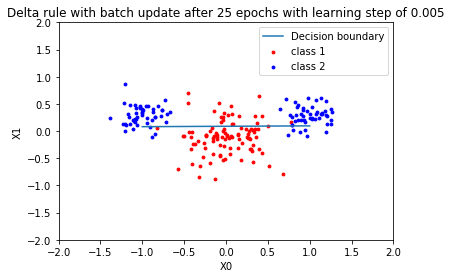

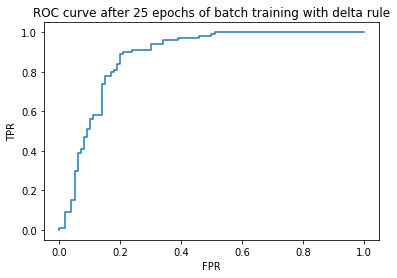

(100, 3)
(100, 3)
(150, 2)
(30,)
(30,)


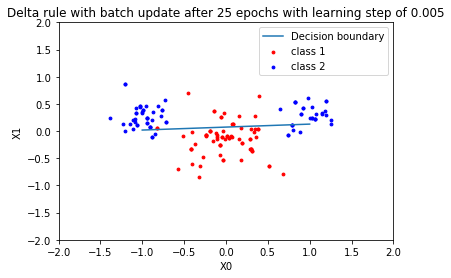

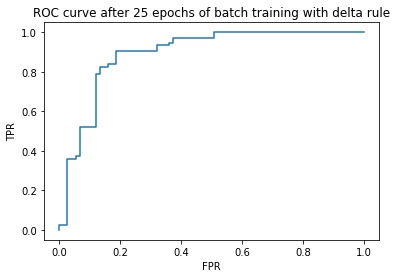

(100, 3)
(100, 3)
(150, 2)
(30,)
(30,)


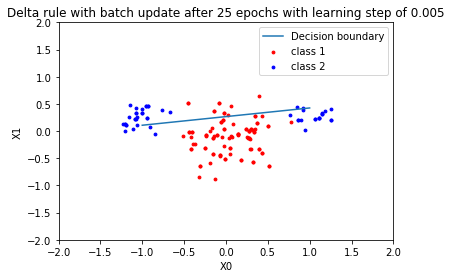

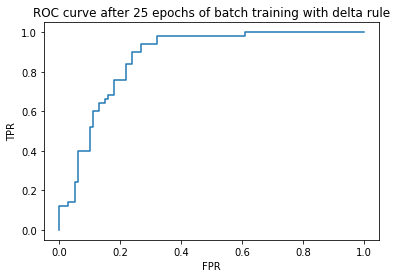

(100, 3)
(100, 3)
(175, 2)
(30,)
(30,)


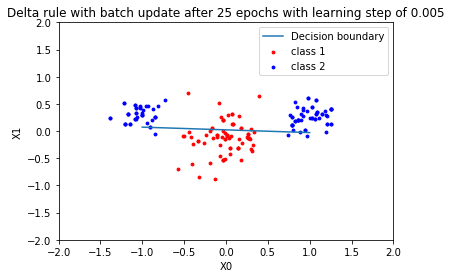

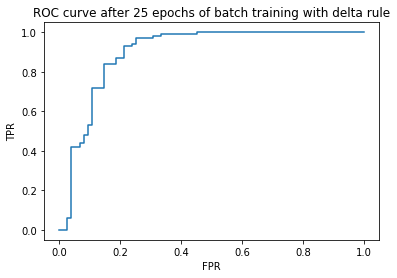

(50, 3)
(0, 3)
(50, 3)
(0, 3)
(150, 2)
(30,)
(30,)


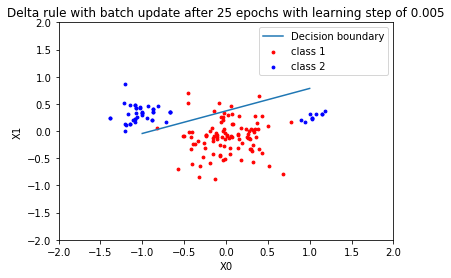

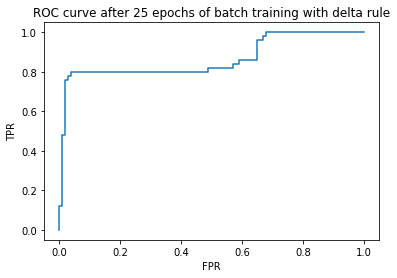

In [629]:
#3.1.3b)

# apply the Delta learning rule in batch mode to this new dataset as well
# as to different versions of the subsampled data, i.e. before training please remo-
# ve 25% of data samples (for two classes with n=100 samples each, remove 50
# samples) according to the following scenarios:

#delta batch
delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance, weights = delta.fit(patterns = nonsep_data2[:,:2], targets = nonsep_data2[:,2], epochs = 25)
decision_boundary(patterns = nonsep_data2[:,:2], targets = nonsep_data2[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
fpr, tpr, _ = roc_curve(nonsep_data2[:,2],np.reshape(performance['Predictions'],(nonsep_data2[:,2].shape[0],1)))
plt.plot(fpr,tpr)
plt.title('ROC curve after 25 epochs of batch training with delta rule')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()




# 25% from each class
subset = random_subset(nonsep_data2,25,25)

delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
fpr, tpr, _ = roc_curve(subset[:,2],np.reshape(performance['Predictions'],(subset[:,2].shape[0],1)))
plt.plot(fpr,tpr)
plt.title('ROC curve after 25 epochs of batch training with delta rule')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_curve
# random 50% from classA
subset = random_subset(nonsep_data2,50)

delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
fpr, tpr, _ = roc_curve(subset[:,2],np.reshape(performance['Predictions'],(subset[:,2].shape[0],1)))
plt.plot(fpr,tpr)
plt.title('ROC curve after 25 epochs of batch training with delta rule')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# random 50% from class B
subset = random_subset(nonsep_data2,0,25)

delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
fpr, tpr, _ = roc_curve(subset[:,2],np.reshape(performance['Predictions'],(subset[:,2].shape[0],1)))
plt.plot(fpr,tpr)
plt.title('ROC curve after 25 epochs of batch training with delta rule')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# 20% from a subset of classA for which classA(1,:)<0 and 80% from a
# subset of classA for which classA(1,:)>0
dataA1 = nonsep_data2[np.where((nonsep_data2.T[2]==1)&(nonsep_data2.T[0]<0))]
dataA2 = nonsep_data2[np.where((nonsep_data2.T[2]==1)&(nonsep_data2.T[0]>0))]
subsetA1 = random_subset(dataA1,20)
subsetA2 = random_subset(dataA2,80)
dataB= nonsep_data2[np.where(nonsep_data2.T[2]==-1)]
subset = np.append(np.append(subsetA1,subsetA2,axis=0),dataB,axis=0)
np.random.shuffle(subset)


delta = single_layered_perceptron(lr=0.005,update='batch',rule='delta')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
fpr, tpr, _ = roc_curve(subset[:,2],np.reshape(performance['Predictions'],(subset[:,2].shape[0],1)))
plt.plot(fpr,tpr)
plt.title('ROC curve after 25 epochs of batch training with delta rule')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

(200, 2)
(30,)
(30,)


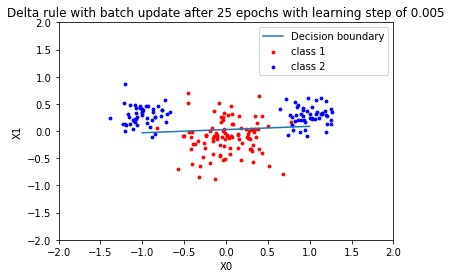

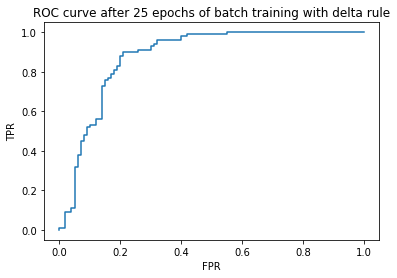

(100, 3)
(100, 3)
(150, 2)
(30,)
(30,)


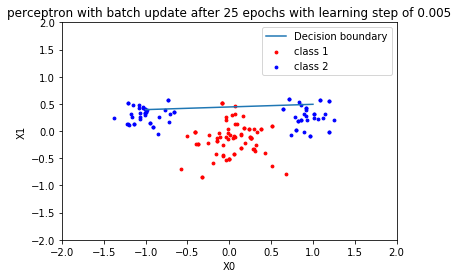

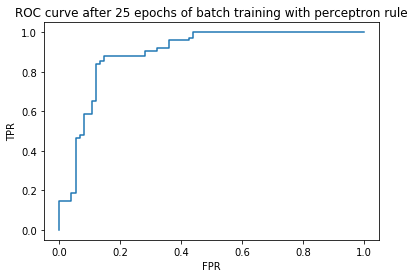

(100, 3)
(100, 3)
(150, 2)
(30,)
(30,)


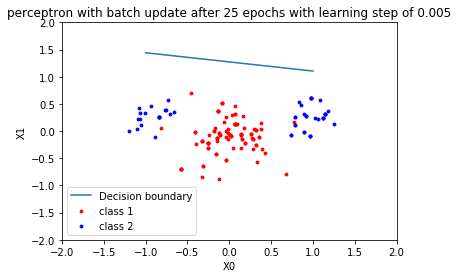

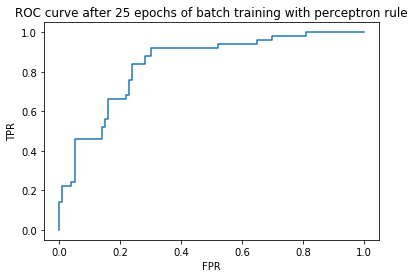

(100, 3)
(100, 3)
(175, 2)
(30,)
(30,)


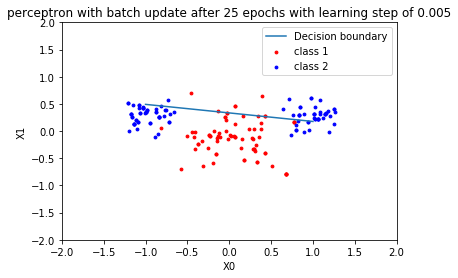

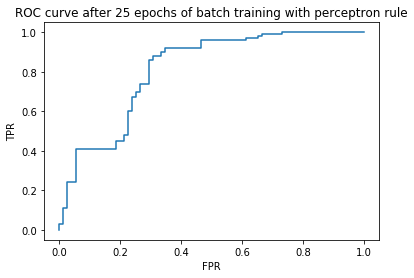

(50, 3)
(0, 3)
(50, 3)
(0, 3)
(150, 2)
(30,)
(30,)


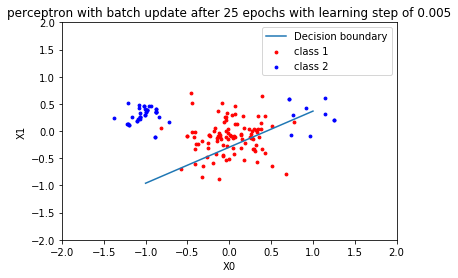

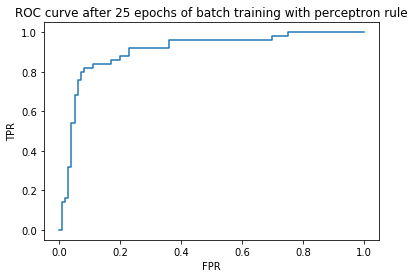

In [630]:
# 3.1.3 c)

# Perform simulations, i.e. subsample your data (from the same dataset generated
# originally) and perform perceptron learning, a few times. What is the effect of
# different data subsampling manipulations on the results, i.e. the localisation of
# the decision boundary as well as the performance? Since the number of samples
# representing different classes are different for the last three cases, it may be easier
# to measure the performance using the accuracy rate estimated independently
# for each class (alternatively, one could quantify sensitivity and specifcity).
# In your observations re
# ect on the implications of subsampling - data points
# that you remove could be thought of as an unseen test set. How would the
# resulting sampling bias, both in the context of uneven class representations and
# non-representative sample distribution, affect the generalisation?


#perceptron batch
delta = single_layered_perceptron(lr=0.005,update='batch',rule='perceptron')
performance, weights = delta.fit(patterns = nonsep_data2[:,:2], targets = nonsep_data2[:,2], epochs = 25)
decision_boundary(patterns = nonsep_data2[:,:2], targets = nonsep_data2[:,2], final_weights = weights[:2], bias = weights[2], rule='Delta rule',update='batch',learning_step=0.005)
fpr, tpr, _ = roc_curve(nonsep_data2[:,2],np.reshape(performance['Predictions'],(nonsep_data2[:,2].shape[0],1)))
plt.plot(fpr,tpr)
plt.title('ROC curve after 25 epochs of batch training with delta rule')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()




# 25% from each class
subset = random_subset(nonsep_data2,25,25)

delta = single_layered_perceptron(lr=0.005,update='batch',rule='perceptron')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='perceptron',update='batch',learning_step=0.005)
fpr, tpr, _ = roc_curve(subset[:,2],np.reshape(performance['Predictions'],(subset[:,2].shape[0],1)))
plt.plot(fpr,tpr)
plt.title('ROC curve after 25 epochs of batch training with perceptron rule')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

from sklearn.metrics import roc_curve
# random 50% from classA
subset = random_subset(nonsep_data2,50)

delta = single_layered_perceptron(lr=0.005,update='batch',rule='perceptron')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='perceptron',update='batch',learning_step=0.005)
fpr, tpr, _ = roc_curve(subset[:,2],np.reshape(performance['Predictions'],(subset[:,2].shape[0],1)))
plt.plot(fpr,tpr)
plt.title('ROC curve after 25 epochs of batch training with perceptron rule')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# random 50% from class B
subset = random_subset(nonsep_data2,0,25)

delta = single_layered_perceptron(lr=0.005,update='batch',rule='perceptron')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='perceptron',update='batch',learning_step=0.005)
fpr, tpr, _ = roc_curve(subset[:,2],np.reshape(performance['Predictions'],(subset[:,2].shape[0],1)))
plt.plot(fpr,tpr)
plt.title('ROC curve after 25 epochs of batch training with perceptron rule')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# 20% from a subset of classA for which classA(1,:)<0 and 80% from a
# subset of classA for which classA(1,:)>0
dataA1 = nonsep_data2[np.where((nonsep_data2.T[2]==1)&(nonsep_data2.T[0]<0))]
dataA2 = nonsep_data2[np.where((nonsep_data2.T[2]==1)&(nonsep_data2.T[0]>0))]
subsetA1 = random_subset(dataA1,20)
subsetA2 = random_subset(dataA2,80)
dataB= nonsep_data2[np.where(nonsep_data2.T[2]==-1)]
subset = np.append(np.append(subsetA1,subsetA2,axis=0),dataB,axis=0)
np.random.shuffle(subset)


delta = single_layered_perceptron(lr=0.005,update='batch',rule='perceptron')
performance, weights = delta.fit(patterns = subset[:,:2], targets = subset[:,2], epochs = 25)
decision_boundary(patterns = subset[:,:2], targets = subset[:,2], final_weights = weights[:2], bias = weights[2], rule='perceptron',update='batch',learning_step=0.005)
fpr, tpr, _ = roc_curve(subset[:,2],np.reshape(performance['Predictions'],(subset[:,2].shape[0],1)))
plt.plot(fpr,tpr)
plt.title('ROC curve after 25 epochs of batch training with perceptron rule')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()